In [1]:
import os
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns  ###
import cartopy.crs as ccrs
sns.set(style='darkgrid') ### seaborn gives a nice design


In [2]:
# Upload scneario 2 - Storage defined by store and links
#n = pypsa.Network("C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")



INFO:pypsa.io:Imported network elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [3]:
n.global_constraints

,type,carrier_attribute,sense,constant,mu
name,,,,,
CO2Limit,primary_energy,co2_emissions,<=,0.000000e+00,209953.770374
lv_factor,transmission_volume_expansion_limit,"AC, DC",<=,3.997208e+08,123.733585


In [4]:
storage_comp = n.links.iloc[42:] 
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-low-LCOS'])].iloc[:,:]
installed_capacity_electrolysor_low_LCOS = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-low-LCOS'])].iloc[:,:]
installed_capacity_fuel_cell_low_LCOS = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-l-LCOS'])].iloc[:,:]
installed_capacity_H2_storage_low_LCOS = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum()

In [5]:
installed_capacity_electrolysor_low_LCOS.sum()

23566.697180153344

In [6]:
installed_capacity_fuel_cell_low_LCOS.sum()

112500.95948404737

In [7]:
installed_capacity_H2_storage_low_LCOS.sum()

3301666.239481674

In [8]:
storage_comp = n.links.iloc[42:] 
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS'])].iloc[:,:]
installed_capacity_electrolysor_high_LCOS = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS'])].iloc[:,:]
installed_capacity_fuel_cell_high_LCOS = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS'])].iloc[:,:]
installed_capacity_H2_storage_high_LCOS = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum()

In [9]:
installed_capacity_electrolysor_high_LCOS.sum()

43686.57182197573

In [10]:
installed_capacity_fuel_cell_high_LCOS.sum()

106107.71093330668

In [11]:
installed_capacity_H2_storage_high_LCOS.sum()

9790922.307398014

In [12]:
#Overview components
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 724 entries
Component 'Carrier' has 13 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 327 entries
Component 'LineType' has 31 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 1128 entries
Component 'Load' has 181 entries
Component 'Generator' has 737 entries
Component 'StorageUnit' has 182 entries
Component 'Store' has 543 entries


In [13]:
#temporal resolution
len(n.snapshots)

8760

In [14]:
#Total installed generator capacity
gen_cap = n.generators.groupby(['carrier']).p_nom_opt.sum()
gen_cap

carrier
biomass         9901.808000
geothermal       828.800000
nuclear        97710.800000
offwind-ac     91817.502834
offwind-dc    136673.934504
onwind        258406.515014
ror            34503.916704
solar         325821.036090
Name: p_nom_opt, dtype: float64

In [15]:
total_cap = n.generators.groupby(['carrier']).p_nom_opt.sum().sum()
total_cap

955664.3131465097

In [16]:
#Percentage of total capacity [%]
n.generators.groupby(['carrier']).p_nom_opt.sum().apply(lambda x: x/total_cap)*100

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


carrier
biomass        1.036118
geothermal     0.086725
nuclear       10.224385
offwind-ac     9.607715
offwind-dc    14.301458
onwind        27.039465
ror            3.610464
solar         34.093670
Name: p_nom_opt, dtype: float64

In [17]:
#Share of total el. production per carrier
CCGT_energy = n.generators_t.p.sum(axis=0).filter(like="CCGT", axis=0).sum()
OCGT_energy = n.generators_t.p.sum(axis=0).filter(like="OCGT", axis=0).sum()
biomass_energy = n.generators_t.p.sum(axis=0).filter(like="biomass", axis=0).sum()
coal_energy = n.generators_t.p.sum(axis=0).filter(like="coal", axis=0).sum()
geothermal_energy = n.generators_t.p.sum(axis=0).filter(like="geothermal", axis=0).sum()
lignite_energy = n.generators_t.p.sum(axis=0).filter(like="lignite", axis=0).sum()
nuclear_energy = n.generators_t.p.sum(axis=0).filter(like="nuclear", axis=0).sum()
offwind_ac_energy = n.generators_t.p.sum(axis=0).filter(like="offwind-ac", axis=0).sum()
offwind_dc_energy = n.generators_t.p.sum(axis=0).filter(like="offwind-dc", axis=0).sum()
onwind_energy = n.generators_t.p.sum(axis=0).filter(like="onwind", axis=0).sum()
oil_energy = n.generators_t.p.sum(axis=0).filter(like="oil", axis=0).sum()
onwind_energy = n.generators_t.p.sum(axis=0).filter(like="onwind", axis=0).sum()
ror_energy = n.generators_t.p.sum(axis=0).filter(like="ror", axis=0).sum()
solar_energy = n.generators_t.p.sum(axis=0).filter(like="solar", axis=0).sum()

shares = pd.DataFrame([[CCGT_energy],[OCGT_energy],[biomass_energy],[coal_energy],[geothermal_energy],[lignite_energy],[nuclear_energy],[offwind_ac_energy],[offwind_dc_energy],[oil_energy],[onwind_energy],[ror_energy],[solar_energy]], 
                          columns=['Energy generation per year [MWh]'], 
                          index = ['CCGT','OCGT','biomass','coal','geothermal','lignite','nuclear','offwind-ac','offwind-dc','oil','onwind','ror','solar'])
shares #MWh

,Energy generation per year [MWh]
CCGT,0.000000e+00
OCGT,0.000000e+00
biomass,8.072631e+07
coal,0.000000e+00
geothermal,0.000000e+00
lignite,0.000000e+00
nuclear,7.357969e+08
offwind-ac,3.431206e+08
offwind-dc,6.193356e+08
oil,0.000000e+00


In [18]:
total = shares.iloc[:].sum().iloc[0]
total

2913544063.5711827

In [19]:
shares = pd.DataFrame([[biomass_energy,biomass_energy/total,biomass_energy/(gen_cap.loc['biomass']*8760)],[geothermal_energy,geothermal_energy/total,geothermal_energy/(gen_cap.loc['geothermal']*8760)],[nuclear_energy,nuclear_energy/total, nuclear_energy/(gen_cap.loc['nuclear']*8760)],[offwind_ac_energy,offwind_ac_energy/total,offwind_ac_energy/(gen_cap.loc['offwind-ac']*8760)],[offwind_dc_energy,offwind_dc_energy/total,offwind_dc_energy/(gen_cap.loc['offwind-dc']*8760)],[onwind_energy,onwind_energy/total, onwind_energy/(gen_cap.loc['onwind']*8760)],[ror_energy,ror_energy/total,ror_energy/(gen_cap.loc['ror']*8760)],[solar_energy,solar_energy/total,solar_energy/(gen_cap.loc['solar']*8760)]], 
                          columns=['Energy generation per year [MWh]', 'in %', 'Capacity factor'], 
                          index = ['biomass','geothermal','nuclear','offwind-ac','offwind-dc','onwind','ror','solar'])

shares

,Energy generation per year [MWh],in %,Capacity factor
biomass,8.072631e+07,0.027707,0.930672
geothermal,0.000000e+00,0.000000,0.000000
nuclear,7.357969e+08,0.252544,0.859629
offwind-ac,3.431206e+08,0.117767,0.426596
offwind-dc,6.193356e+08,0.212571,0.517293
onwind,6.313742e+08,0.216703,0.278920
ror,1.397474e+08,0.047965,0.462350
solar,3.634431e+08,0.124743,0.127337


In [20]:
index_generators = n.generators_t.p.sum(axis=0).index
curtailed_power = []

for item in range(0,len(index_generators)):
    index_name = index_generators[item]  
    wind_condition = n.generators_t["p_max_pu"].filter(like=index_name, axis=1) 
    install_power_real = (n.generators["p_nom_opt"].filter(like=index_name, axis=0))
    available_power_real = wind_condition.apply(lambda x: x*install_power_real[0]) 
    dispatched_power = (n.generators_t.p.filter(like=index_name, axis=1))
    curtailed = (available_power_real-dispatched_power)/available_power_real
    if item == 0:
        curtailment = curtailed
    else:
        curtailment = curtailment.join(curtailed)

In [21]:
index_generators = n.generators_t.p.sum(axis=0).index
curtailed_power = []

for item in range(0,len(index_generators)):
    index_name = index_generators[item]  
    wind_condition = n.generators_t["p_max_pu"].filter(like=index_name, axis=1) 
    install_power_real = (n.generators["p_nom_opt"].filter(like=index_name, axis=0))
    available_power_real = wind_condition.apply(lambda x: x*install_power_real[0]) 
    dispatched_power = (n.generators_t.p.filter(like=index_name, axis=1))
    if item == 0:
        dispatch = dispatched_power
    else:
        dispatch = dispatch.join(dispatched_power)

In [22]:
index_generators = n.generators_t.p.sum(axis=0).index
curtailed_power = []

for item in range(0,len(index_generators)):
    index_name = index_generators[item]  
    wind_condition = n.generators_t["p_max_pu"].filter(like=index_name, axis=1) 
    install_power_real = (n.generators["p_nom_opt"].filter(like=index_name, axis=0))
    available_power_real = wind_condition.apply(lambda x: x*install_power_real[0]) 
    dispatched_power = (n.generators_t.p.filter(like=index_name, axis=1))
    curtailed = (available_power_real-dispatched_power)
    if item == 0:
        curtailed_power = curtailed
    else:
        curtailed_power = curtailed_power.join(curtailed)

In [23]:
generator_stats = pd.DataFrame(data=(curtailed_power.sum()).values, columns=['Curtailment_in_MWh'])
generator_stats['curtailment_in_percentage']= (curtailment.mean()).values
generator_stats['carrier']= n.generators.carrier.values
generator_stats['bus']= n.generators.bus.values
generator_stats['dispatched_power']=(dispatch.sum()).values
generator_stats

,Curtailment_in_MWh,curtailment_in_percentage,carrier,bus,dispatched_power
0,375.851852,0.264808,offwind-ac,AL0 0,2.169136e+03
1,86.065855,0.420574,onwind,AL0 0,1.586854e+02
2,26982.196685,0.004519,solar,AL0 0,3.575981e+06
3,4.073737,0.476532,onwind,AT0 0,4.400756e+00
4,1197.474067,0.000773,ror,AT0 0,1.681953e+06
...,...,...,...,...,...
732,539.159122,0.000693,solar,SI0 0,1.286457e+06
733,0.000000,NaN,nuclear,SK0 0,1.680096e+07
734,441.063547,0.277295,onwind,SK0 0,2.001428e+03
735,919.262075,0.000566,ror,SK0 0,2.141600e+06


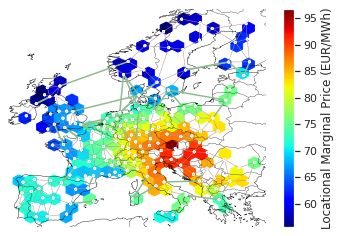

In [24]:
###Plot of Average Marginal Price###

now = n.snapshots[4] ##one specific time

fig,ax = plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()})
fig.set_size_inches(6,4)

n.plot(ax=ax,line_widths=pd.Series(0.5,n.lines.index))
plt.hexbin(n.buses.x, n.buses.y, 
           gridsize=20,
           #C=n.buses_t.marginal_price.loc[now], #at one time (previous set up by scigrid)
           C=n.buses_t.marginal_price.sum()/len(n.snapshots[:]), #Marginal price averaged over the whole year (My version) 
                                                                 #- shows in which regions electricity will be cheap and where el. intensive companies should be placed.
           cmap=plt.cm.jet)

#for some reason the colorbar only works with graphs plt.plot
#and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (EUR/MWh)')

In [25]:
#Table configuration:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [33]:
#Check if all carriers are assigned to colors
n.carriers['color']

name
biomass               #282D3C
geothermal            #282D3C
nuclear               #ff9000
onwind                #235ebc
offwind-ac            #74c6f2
offwind-dc            #74c6f2
solar                 #f9d002
PHS                   #006B54
hydro                 #006B54
ror                   #8D9440
H2-scenario-h-LCOS    #FFDC87
H2-scenario-l-LCOS    #4DD1BC
battery               #FFDC87
H2-high-LCOS          #f05d7c
H2-low-LCOS           #74e2d1
Name: color, dtype: object

In [29]:
n.carriers.at['H2-high-LCOS', 'color'] = '#f05d7c' #light red
n.carriers.at['H2-low-LCOS', 'color'] = '#74e2d1' #light green
n.carriers.at['H2-high-LCOS', 'nice_name'] = 'H2-unit high LCOS' 
n.carriers.at['H2-low-LCOS', 'nice_name'] = 'H2-unit low LCOS' 

n.carriers.at['nuclear', 'nice_name'] = 'Nuclear' 
n.carriers.at['geothermal', 'nice_name'] = 'Geothermal' 
n.carriers.at['geothermal', 'color'] = '#282D3C'
n.carriers.at['biomass', 'nice_name'] = 'Biomass' 
n.carriers.at['biomass', 'color'] = '#282D3C'

##FABIAN COMMENTS
n.carriers.at['offwind-ac', 'nice_name'] = 'Offshore Wind(AC)'
n.carriers.at['offwind-dc', 'nice_name'] = 'Offshore Wind(DC)'
n.carriers.at['offwind-ac', 'color'] = '#74c6f2'
n.carriers.at['offwind-dc', 'color'] = '#74c6f2' 

n.carriers.at['PHS', 'color'] = '#006B54'
n.carriers.at['hydro', 'color'] = '#006B54'

n.carriers.at['ror', 'color'] = '#8D9440' 

In [28]:
#Color setting for missing definition
n.carriers['color'].iloc[10] = '#FFDC87'  #kind of yellow. battery-low-LCOS
n.carriers['color'].iloc[12] = '#FFDC87'  #kind of yellow. battery-high-LCOS
n.carriers['color'].iloc[11] = '#4DD1BC'  #mint green. H2 scenario

/home/max/anaconda3/envs/pypsa-eur/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Check if nuclear is optimised:

C:\Users\Max\miniconda3\lib\site-packages\pypsa\plot.py:159: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection=projection)


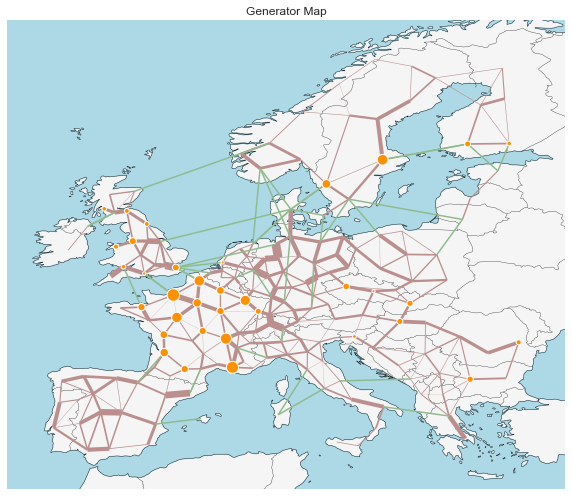

In [24]:
fig,ax = plt.subplots(
        figsize=(10,10),
        subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
)

#loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(margin=0.1, 
        ax=None, 
        geomap=True, #'10m' leads to a beautiful high resolution map 
        projection= None, 
        bus_colors='cadetblue', 
        bus_alpha=1, 
        bus_sizes=n.generators.loc[n.generators['carrier'].apply(lambda x: x in ['nuclear'])].iloc[:,:].groupby(['bus','carrier']).p_nom_opt.sum()*.00003, 
        bus_cmap=None, 
        line_colors='rosybrown', 
        link_colors='darkseagreen', #loading
        transformer_colors='orange', 
        line_widths=n.lines.s_nom_opt/3e3, 
        link_widths=1.5, 
        transformer_widths=1.5, 
        line_cmap=None, 
        link_cmap=None, #plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None, 
        flow=None, 
        branch_components=None, 
        layouter=None, 
        title='Generator Map', 
        boundaries=None, 
        geometry=False, 
        jitter=None, 
        color_geomap=True)#None or True

ax.axis('off');

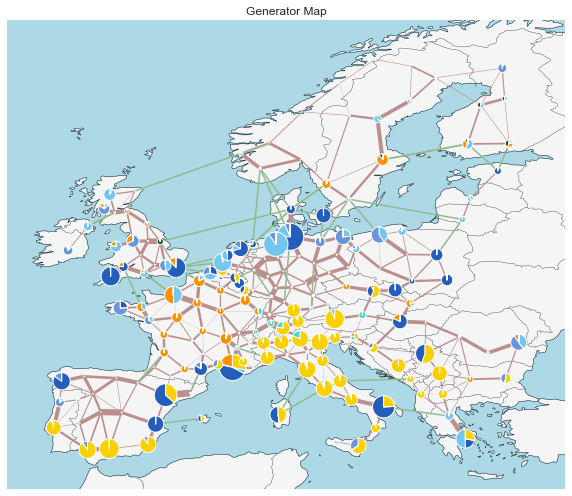

In [25]:
fig,ax = plt.subplots(
        figsize=(10,10),
        subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
)

#loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(margin=0.1, 
        ax=None, 
        geomap=True, #'10m' leads to a beautiful high resolution map 
        projection= None, 
        bus_colors='cadetblue', 
        bus_alpha=1, 
        bus_sizes=n.generators.iloc[:,:].groupby(['bus','carrier']).p_nom_opt.sum()*.00003, 
        bus_cmap=None, 
        line_colors='rosybrown', 
        link_colors='darkseagreen', #loading
        transformer_colors='orange', 
        line_widths=n.lines.s_nom_opt/3e3, 
        link_widths=1.5, 
        transformer_widths=1.5, 
        line_cmap=None, 
        link_cmap=None, #plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None, 
        flow=None, 
        branch_components=None, 
        layouter=None, 
        title='Generator Map', 
        boundaries=None, 
        geometry=False, 
        jitter=None, 
        color_geomap=True)#None or True

ax.axis('off');

In [30]:
###map.py von Fabian
"""
Network expansion plotting functions.
"""

__author__ = "Fabian Neumann (KIT)"
__copyright__ = "Copyright 2019-2020 Fabian Neumann (KIT), GNU GPL 3"

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch




def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=2,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [1000, 500, 100]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=2.5,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 5.5e4
    branch_factor = 2e3

    fields = ["bus", "carrier", "p_nom_opt"]
    pie_components = pd.concat(
        [
            n.generators.loc[n.generators.carrier != "load", fields],
            n.storage_units[fields],
        ]
    )
    bus_sizes = pie_components.groupby(["bus", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        
        
        


In [1]:
#pd.concat([n.generators.loc[n.generators.carrier != "load", ["bus", "carrier", "p_nom_opt"]],n.storage_units[["bus", "carrier", "p_nom_opt"]],])

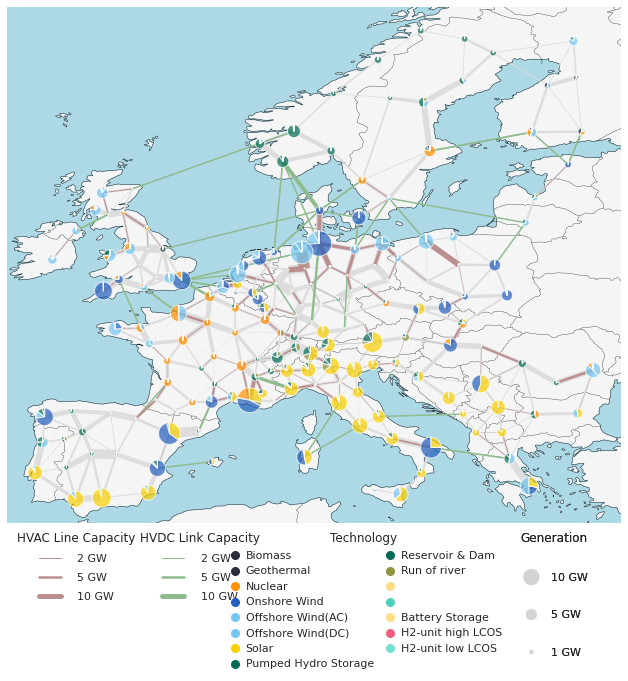

In [32]:
plot_network(n, fn=None)

## Formal analysis

### 1. Emission reduction and system cost data

In [29]:
n20 = n

In [30]:
#Single scenario | Multiple scenarios in comments

data = [n20.objective / 1e9] #[n05.objective / 1e9 , n10.objective/ 1e9 , n20.objective/ 1e9 , n40.objective/ 1e9 , n60.objective/ 1e9 ] #Billion euro
index = ['20%'] #['5%', '10%', '20%', '40%', '60%']
data2 = n20.objective/(n.loads_t.p_set.sum(axis=1).sum())
network_obj = pd.DataFrame({'Percentage of EU emission in 2013':index,
                           'Total System Cost [B€]':data,'Average el. system price [€/MWh]':data2 }, 
                           columns = ['Percentage of EU emission in 2013','Total System Cost [B€]','Average el. system price [€/MWh]'],
                          )
network_obj

,Percentage of EU emission in 2013,Total System Cost [B€],Average el. system price [€/MWh]
0,20%,139.934777,44.597979


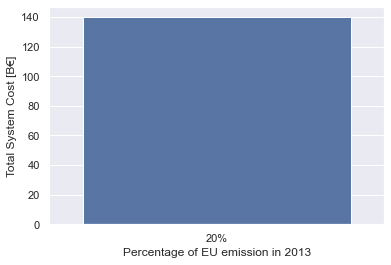

In [31]:
sns.barplot(x = 'Percentage of EU emission in 2013', y = 'Total System Cost [B€]', data = network_obj)

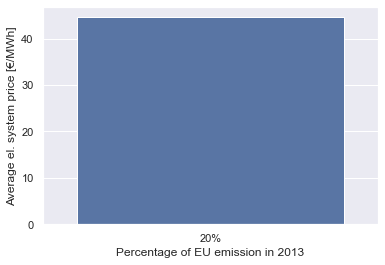

In [32]:
sns.barplot(x = 'Percentage of EU emission in 2013', y = 'Average el. system price [€/MWh]', data = network_obj)

### 2. Amount of storage

##### Step 1. Check the aggregated values

In [2]:
#filters only storage components
storage_comp = n.links.iloc[43:] 
#storage_comp


NameError: name 'n' is not defined

In [34]:
#Total demand for storage components
storage_comp.groupby(['carrier']).p_nom_opt.sum()

#Result. Both expensive and cheap storage are optimized.

carrier
H2 electrolysis-high-LCOS     43631.568363
H2 electrolysis-low-LCOS      23566.697180
H2 fuel cell-high-LCOS       106107.710933
H2 fuel cell-low-LCOS        112500.959484
battery charger                3787.382538
battery discharger             4208.202820
Name: p_nom_opt, dtype: float64

In [35]:
n.storage_units.groupby(['carrier']).p_nom_opt.sum()/1000

carrier
PHS      54.593581
hydro    99.562201
Name: p_nom_opt, dtype: float64

In [36]:
#Total storage size
n.stores.iloc[:,:].groupby(['carrier']).e_nom_opt.sum()*1 #MWh

carrier
H2-scenario-h-LCOS    9.790922e+06
H2-scenario-l-LCOS    3.301666e+06
battery               1.286164e+04
Name: e_nom_opt, dtype: float64

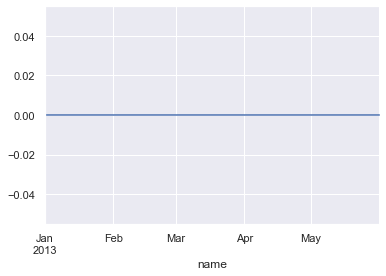

In [37]:
n.links_t#.p.groupby(['carrier']).sum()   #.iloc[:,:]#.groupby(['carrier']).p.sum()
n.links_t.p0.loc["2013-1":"2013-5"].filter(like="H2-scenario Fuel Cell-high").sum(axis=1).plot()

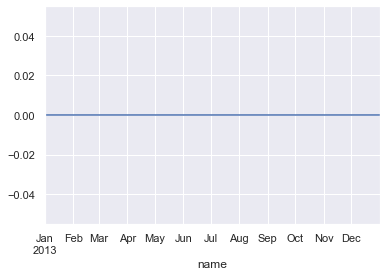

In [38]:
n.stores_t.q.loc["2013-01":"2013-12"].filter(like="H2-scenario").sum(axis=1).plot()

In [3]:
#n.components

In [40]:
n.stores_t.e.head()

name,AL0 0 H2-scenario-h-LCOS,AT0 0 H2-scenario-h-LCOS,AT0 1 H2-scenario-h-LCOS,AT0 2 H2-scenario-h-LCOS,BA0 0 H2-scenario-h-LCOS,BE0 0 H2-scenario-h-LCOS,BE0 1 H2-scenario-h-LCOS,BE0 2 H2-scenario-h-LCOS,BE0 3 H2-scenario-h-LCOS,BE0 4 H2-scenario-h-LCOS,BG0 0 H2-scenario-h-LCOS,BG0 1 H2-scenario-h-LCOS,CH0 0 H2-scenario-h-LCOS,CH0 1 H2-scenario-h-LCOS,CH0 2 H2-scenario-h-LCOS,CZ0 0 H2-scenario-h-LCOS,CZ0 1 H2-scenario-h-LCOS,CZ0 2 H2-scenario-h-LCOS,DE0 0 H2-scenario-h-LCOS,DE0 1 H2-scenario-h-LCOS,DE0 10 H2-scenario-h-LCOS,DE0 11 H2-scenario-h-LCOS,DE0 12 H2-scenario-h-LCOS,DE0 13 H2-scenario-h-LCOS,DE0 14 H2-scenario-h-LCOS,DE0 15 H2-scenario-h-LCOS,DE0 16 H2-scenario-h-LCOS,DE0 17 H2-scenario-h-LCOS,DE0 18 H2-scenario-h-LCOS,DE0 19 H2-scenario-h-LCOS,DE0 2 H2-scenario-h-LCOS,DE0 20 H2-scenario-h-LCOS,DE0 21 H2-scenario-h-LCOS,DE0 22 H2-scenario-h-LCOS,DE0 23 H2-scenario-h-LCOS,DE0 24 H2-scenario-h-LCOS,DE0 25 H2-scenario-h-LCOS,DE0 3 H2-scenario-h-LCOS,DE0 4 H2-scenario-h-LCOS,DE0 5 H2-scenario-h-LCOS,DE0 6 H2-scenario-h-LCOS,DE0 7 H2-scenario-h-LCOS,DE0 8 H2-scenario-h-LCOS,DE0 9 H2-scenario-h-LCOS,DK0 0 H2-scenario-h-LCOS,DK3 0 H2-scenario-h-LCOS,EE6 0 H2-scenario-h-LCOS,ES0 0 H2-scenario-h-LCOS,ES0 1 H2-scenario-h-LCOS,ES0 10 H2-scenario-h-LCOS,ES0 11 H2-scenario-h-LCOS,ES0 12 H2-scenario-h-LCOS,ES0 13 H2-scenario-h-LCOS,ES0 2 H2-scenario-h-LCOS,ES0 3 H2-scenario-h-LCOS,ES0 4 H2-scenario-h-LCOS,ES0 5 H2-scenario-h-LCOS,ES0 6 H2-scenario-h-LCOS,ES0 7 H2-scenario-h-LCOS,ES0 8 H2-scenario-h-LCOS,ES0 9 H2-scenario-h-LCOS,ES2 0 H2-scenario-h-LCOS,FI3 0 H2-scenario-h-LCOS,FI3 1 H2-scenario-h-LCOS,FI3 2 H2-scenario-h-LCOS,FI3 3 H2-scenario-h-LCOS,FI3 4 H2-scenario-h-LCOS,FR0 0 H2-scenario-h-LCOS,FR0 1 H2-scenario-h-LCOS,FR0 10 H2-scenario-h-LCOS,FR0 11 H2-scenario-h-LCOS,FR0 12 H2-scenario-h-LCOS,FR0 13 H2-scenario-h-LCOS,FR0 14 H2-scenario-h-LCOS,FR0 15 H2-scenario-h-LCOS,FR0 16 H2-scenario-h-LCOS,FR0 17 H2-scenario-h-LCOS,FR0 18 H2-scenario-h-LCOS,FR0 19 H2-scenario-h-LCOS,FR0 2 H2-scenario-h-LCOS,FR0 20 H2-scenario-h-LCOS,FR0 21 H2-scenario-h-LCOS,FR0 22 H2-scenario-h-LCOS,FR0 23 H2-scenario-h-LCOS,FR0 24 H2-scenario-h-LCOS,FR0 25 H2-scenario-h-LCOS,FR0 26 H2-scenario-h-LCOS,FR0 27 H2-scenario-h-LCOS,FR0 3 H2-scenario-h-LCOS,FR0 4 H2-scenario-h-LCOS,FR0 5 H2-scenario-h-LCOS,FR0 6 H2-scenario-h-LCOS,FR0 7 H2-scenario-h-LCOS,FR0 8 H2-scenario-h-LCOS,FR0 9 H2-scenario-h-LCOS,GB4 0 H2-scenario-h-LCOS,GB5 0 H2-scenario-h-LCOS,GB5 1 H2-scenario-h-LCOS,GB5 10 H2-scenario-h-LCOS,GB5 11 H2-scenario-h-LCOS,GB5 12 H2-scenario-h-LCOS,GB5 13 H2-scenario-h-LCOS,GB5 14 H2-scenario-h-LCOS,GB5 15 H2-scenario-h-LCOS,GB5 16 H2-scenario-h-LCOS,GB5 2 H2-scenario-h-LCOS,GB5 3 H2-scenario-h-LCOS,GB5 4 H2-scenario-h-LCOS,GB5 5 H2-scenario-h-LCOS,GB5 6 H2-scenario-h-LCOS,GB5 7 H2-scenario-h-LCOS,GB5 8 H2-scenario-h-LCOS,GB5 9 H2-scenario-h-LCOS,GR0 0 H2-scenario-h-LCOS,GR0 1 H2-scenario-h-LCOS,HR0 0 H2-scenario-h-LCOS,HU0 0 H2-scenario-h-LCOS,HU0 1 H2-scenario-h-LCOS,IE4 0 H2-scenario-h-LCOS,IT0 0 H2-scenario-h-LCOS,IT0 1 H2-scenario-h-LCOS,IT0 10 H2-scenario-h-LCOS,IT0 11 H2-scenario-h-LCOS,IT0 12 H2-scenario-h-LCOS,IT0 13 H2-scenario-h-LCOS,IT0 14 H2-scenario-h-LCOS,IT0 15 H2-scenario-h-LCOS,IT0 16 H2-scenario-h-LCOS,IT0 2 H2-scenario-h-LCOS,IT0 3 H2-scenario-h-LCOS,IT0 4 H2-scenario-h-LCOS,IT0 5 H2-scenario-h-LCOS,IT0 6 H2-scenario-h-LCOS,IT0 7 H2-scenario-h-LCOS,IT0 8 H2-scenario-h-LCOS,IT0 9 H2-scenario-h-LCOS,IT1 0 H2-scenario-h-LCOS,LT6 0 H2-scenario-h-LCOS,LU0 0 H2-scenario-h-LCOS,LV6 0 H2-scenario-h-LCOS,ME0 0 H2-scenario-h-LCOS,MK0 0 H2-scenario-h-LCOS,NL0 0 H2-scenario-h-LCOS,NL0 1 H2-scenario-h-LCOS,NL0 2 H2-scenario-h-LCOS,NL0 3 H2-scenario-h-LCOS,NL0 4 H2-scenario-h-LCOS,NL0 5 H2-scenario-h-LCOS,NO3 0 H2-scenario-h-LCOS,NO3 1 H2-scenario-h-LCOS,NO3 2 H2-scenario-h-LCOS,NO3 3 H2-scenario-h-LCOS,NO3 4 H2-scenario-h-LCOS,NO3 5 H2-scenario-h-LCOS,NO3 6 H2-scenario-h-LCOS,PL0 0 H2-scenario-h-LCOS,PL0 1 H2-scenario-h-LCOS,PL0 2 H2-scenario-

##### Step 2. Check the distribution of electrolysor

In [41]:
#Adding new colors for plot
add_colors = pd.DataFrame([[0.000, '#f05d7c', 'Option B'],[0.000, '#74e2d1', 'Option B'],[0.000, '#f05d7c', 'Option A'],[0.000, '#74e2d1', 'Option B']], 
                          columns=['co2_emissions', 'color', 'nice_name'], 
                          index = ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS', 'H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])
#['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS']
#['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS']
add_colors

,co2_emissions,color,nice_name
H2 fuel cell-high-LCOS,0.0,#f05d7c,Option B
H2 fuel cell-low-LCOS,0.0,#74e2d1,Option B
H2 electrolysis-high-LCOS,0.0,#f05d7c,Option A
H2 electrolysis-low-LCOS,0.0,#74e2d1,Option B


In [42]:
#Check here if concat(adding new rows) is correct
pd.concat([n.carriers,add_colors])

,co2_emissions,color,nice_name
biomass,0.000,#0c6013,
geothermal,0.026,#ba91b1,
nuclear,0.000,#ff9000,
onwind,0.000,#235ebc,Onshore Wind
offwind-ac,0.000,#6895dd,Offshore Wind (AC)
offwind-dc,0.000,#74c6f2,Offshore Wind (DC)
solar,0.000,#f9d002,Solar
PHS,0.000,#08ad97,Pumped Hydro Storage
hydro,0.000,#08ad97,Reservoir & Dam
ror,0.000,#4adbc8,Run of river


In [43]:
n.carriers = pd.concat([n.carriers,add_colors])

In [44]:
n.carriers.at['biomass', 'nice_name'] = 'Biomass'

In [45]:
n.carriers.at['H2-scenario-h-LCOS', 'color'] = '#141414'
n.carriers

,co2_emissions,color,nice_name
biomass,0.000,#0c6013,Biomass
geothermal,0.026,#ba91b1,
nuclear,0.000,#ff9000,
onwind,0.000,#235ebc,Onshore Wind
offwind-ac,0.000,#6895dd,Offshore Wind (AC)
offwind-dc,0.000,#74c6f2,Offshore Wind (DC)
solar,0.000,#f9d002,Solar
PHS,0.000,#08ad97,Pumped Hydro Storage
hydro,0.000,#08ad97,Reservoir & Dam
ror,0.000,#4adbc8,Run of river


In [46]:
n.carriers

,co2_emissions,color,nice_name
biomass,0.000,#0c6013,Biomass
geothermal,0.026,#ba91b1,
nuclear,0.000,#ff9000,
onwind,0.000,#235ebc,Onshore Wind
offwind-ac,0.000,#6895dd,Offshore Wind (AC)
offwind-dc,0.000,#74c6f2,Offshore Wind (DC)
solar,0.000,#f9d002,Solar
PHS,0.000,#08ad97,Pumped Hydro Storage
hydro,0.000,#08ad97,Reservoir & Dam
ror,0.000,#4adbc8,Run of river


Plot electrolysor distribution:

In [4]:
#Use of lambda to filter perfectly
#storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])]

In [5]:
#Input for plot
#storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])].iloc[:,:].groupby(['bus0','carrier']).p_nom_opt.sum()*1000

C:\Users\Max\miniconda3\lib\site-packages\pypsa\plot.py:159: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection=projection)


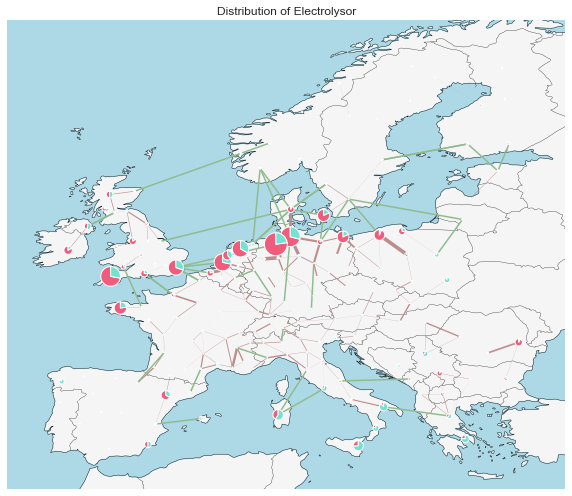

In [49]:
fig,ax = plt.subplots(
        figsize=(10,10),
        subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
)

#loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(margin=0.1, 
        ax=None, 
        geomap=True, #'10m' leads to a beautiful high resolution map 
        projection= None, 
        bus_colors='cadetblue', 
        bus_alpha=1, 
        bus_sizes= storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])].iloc[:,:].groupby(['bus0','carrier']).p_nom_opt.sum()*0.0001, 
        bus_cmap=None, 
        line_colors='rosybrown', 
        link_colors='darkseagreen', #loading
        transformer_colors='orange', 
        line_widths=(n.lines.s_nom_opt-n.lines.s_nom)/3e3, 
        link_widths=1.5, 
        transformer_widths=1.5, 
        line_cmap=None, 
        link_cmap=None, #plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None, 
        flow=None, 
        branch_components=None, 
        layouter=None, 
        title='Distribution of Electrolysor', 
        boundaries=None, 
        geometry=False, 
        jitter=None, 
        color_geomap=True)#None or True

ax.axis('off');

Plot fuel cell distribution:

In [6]:
#Use of lambda to filter perfectly
#storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS'])]

In [7]:
#Input for plot
#storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS'])].iloc[:,:].groupby(['bus1','carrier']).p_nom_opt.sum()*1000

C:\Users\Max\miniconda3\lib\site-packages\pypsa\plot.py:159: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection=projection)


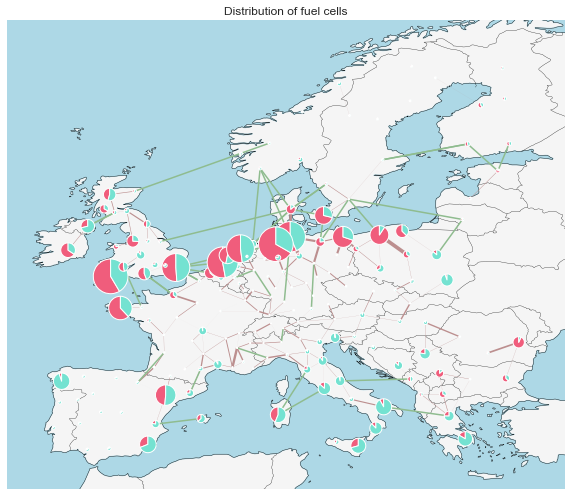

In [52]:
fig,ax = plt.subplots(
        figsize=(10,10),
        subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
)

#loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(margin=0.1, 
        ax=None, 
        geomap=True, #'10m' leads to a beautiful high resolution map 
        projection= None, 
        bus_colors='cadetblue', 
        bus_alpha=1, 
        bus_sizes= storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS'])].iloc[:,:].groupby(['bus1','carrier']).p_nom_opt.sum()*0.0001, 
        bus_cmap=None, 
        line_colors='rosybrown', 
        link_colors='darkseagreen', #loading
        transformer_colors='orange', 
        line_widths=(n.lines.s_nom_opt-n.lines.s_nom)/3e3, 
        link_widths=1.5, 
        transformer_widths=1.5, 
        line_cmap=None, 
        link_cmap=None, #plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None, 
        flow=None, 
        branch_components=None, 
        layouter=None, 
        title='Distribution of fuel cells', 
        boundaries=None, 
        geometry=False, 
        jitter=None, 
        color_geomap=True)#None or True

ax.axis('off');

In [8]:
#n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].iloc[:,:]

C:\Users\Max\miniconda3\lib\site-packages\pypsa\plot.py:159: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection=projection)


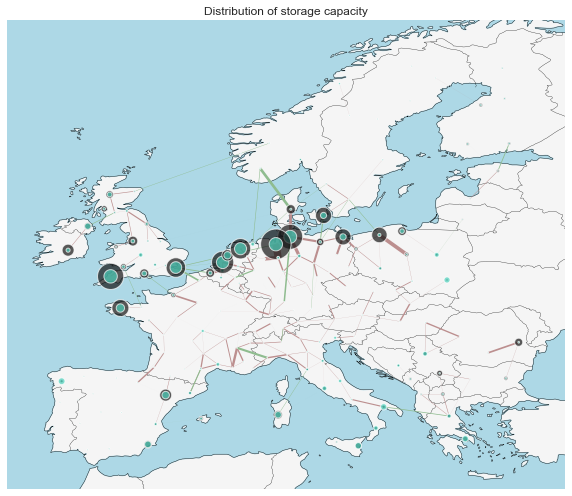

In [54]:
fig,ax = plt.subplots(
        figsize=(10,10),
        subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
)

#loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(margin=0.1, 
        ax=None, 
        geomap=True, #'10m' leads to a beautiful high resolution map 
        projection= None, 
        bus_colors='cadetblue', 
        bus_alpha=0.7, 
        bus_sizes= n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].iloc[:,:].groupby(['bus','carrier']).e_nom_opt.sum()*0.000001, 
        bus_cmap=None, 
        line_colors='rosybrown', 
        link_colors='darkseagreen', #loading
        transformer_colors='orange', 
        line_widths=(n.lines.s_nom_opt-n.lines.s_nom)/3e3, 
        link_widths= (n.links.p_nom_opt-n.links.p_nom)/3e3, 
        transformer_widths=1.5, 
        line_cmap=None, 
        link_cmap=None, #plt.cm.virdis (colordmap for line loading)
        transformer_cmap=None, 
        flow=None, 
        branch_components=None, 
        layouter=None, 
        title='Distribution of storage capacity', 
        boundaries=None, 
        geometry=False, 
        jitter=None, 
        color_geomap=True)#None or True

ax.axis('off');

Plot of storage distribution:

In [55]:
# fig,ax = plt.subplots(
#         figsize=(10,10),
#         subplot_kw={"projection":ccrs.PlateCarree()} #PlateCarree(default), Mercator, Orthographic
# )

# #loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

# n.plot(margin=0.1, 
#         ax=None, 
#         geomap=True, #'10m' leads to a beautiful high resolution map 
#         projection= None, 
#         bus_colors='cadetblue', 
#         bus_alpha=1, 
#         bus_sizes= n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].iloc[:,:].groupby([n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].bus.str[:6],'carrier']).e_nom_opt.sum()*0.000001, 
#         bus_cmap=None, 
#         line_colors='rosybrown', 
#         link_colors='darkseagreen', #loading
#         transformer_colors='orange', 
#         line_widths=(n.lines.s_nom_opt-n.lines.s_nom)/1e3, 
#         link_widths= None, 
#         transformer_widths=1.5, 
#         line_cmap=None, 
#         link_cmap=None, #plt.cm.virdis (colordmap for line loading)
#         transformer_cmap=None, 
#         flow=None, 
#         branch_components=None, 
#         layouter=None, 
#         title='Distribution of storage capacity', 
#         boundaries=None, 
#         geometry=False, 
#         jitter=None, 
#         color_geomap=True)#None or True

# ax.axis('off');

In [56]:
#n.stores.rename(columns = {"bus1": "bus"},inplace = True)

In [ ]:
n.buses

In [ ]:
n.stores

In [ ]:
n.links

In [ ]:
n.generators

In [ ]:
n.storage_units

In [ ]:
n.lines

In [ ]:
#n.generators

## Tested modifications

In [ ]:

# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,
#                          figsize=(size*n_cols,size*n_rows),
#                          subplot_kw={"projection":ccrs.PlateCarree()})

# for i,timestep in enumerate(timesteps):
#     i_row = i // n_cols
#     i_col = i % n_cols
    
#     ax = axes[i_row,i_col]
    
#     network.plot(ax=ax,
#                  line_widths=pd.Series(0.5,network.lines.index),
#                  bus_sizes=0,
#                  line_colors='firebrick',
#                  color_geomap=True)
    
#     # TASK
#     marginal_prices = network.buses_t.marginal_price.loc[network.snapshots[timestep]]

#     hb = ax.hexbin(
#             network.buses.x,
#             network.buses.y, 
#             gridsize=20,
#             C=marginal_prices,
#             cmap=plt.cm.viridis
#          )
    
#     ax.set_title(timestep)

# cb = fig.colorbar(hb, ax=axes.ravel().tolist())

# mini = network.buses_t.marginal_price.min().min()
# maxi = network.buses_t.marginal_price.max().max()

# cb.set_label('Locational Marginal Price (EUR/MWh)') 

In [ ]:
# # replacing bus names/ cleaning them
# n.buses = n.buses.rename(index= lambda x: x.replace("H2-scenario-h-LCOS","")) 
# n.buses = n.buses.rename(index= lambda x: x.replace("H2-scenario-l-LCOS",""))
# n.stores['bus'].apply(lambda x: x.replace("H2-scenario-h-LCOS","")).apply(lambda x: x.replace("H2-scenario-l-LCOS",""))
# n.stores['bus'] = n.stores['bus'].apply(lambda x: x.replace("H2-scenario-h-LCOS","")).apply(lambda x: x.replace("H2-scenario-l-LCOS",""))
# n.stores = n.stores.rename(index= lambda x: x.replace("H2-scenario-h-LCOS","")) 
# n.stores = n.stores.rename(index= lambda x: x.replace("H2-scenario-l-LCOS","")) 
# n.stores['bus']
# #Keeping only the first 6 characters
# n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].iloc[:,:].groupby([n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS','H2-scenario-l-LCOS'])].bus.str[:6],'carrier']).e_nom_opt.sum()*0.000001

# FINAL PLOTS

In [57]:
# Upload scneario 2 - Storage defined by store and links
n = pypsa.Network("C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")
#n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

INFO:pypsa.io:Imported network elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [58]:
#Adding new colors for plot
add_colors = pd.DataFrame([[0.000, '#f05d7c', 'Fuel cell high-LCOS'],[0.000, '#74e2d1', 'Fuel cell low-LCOS'],[0.000, '#f05d7c', 'Electrolysor high-LCOS'],[0.000, '#74e2d1', 'Electrolysor low-LCOS']], 
                          columns=['co2_emissions', 'color', 'nice_name'], 
                          index = ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS', 'H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])
#['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS']
#['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS']
add_colors

,co2_emissions,color,nice_name
H2 fuel cell-high-LCOS,0.0,#f05d7c,Fuel cell high-LCOS
H2 fuel cell-low-LCOS,0.0,#74e2d1,Fuel cell low-LCOS
H2 electrolysis-high-LCOS,0.0,#f05d7c,Electrolysor high-LCOS
H2 electrolysis-low-LCOS,0.0,#74e2d1,Electrolysor low-LCOS


In [59]:
#Check here if concat(adding new rows) is correct
n.carriers = pd.concat([n.carriers,add_colors])

In [60]:
n.carriers.at['H2-scenario-h-LCOS', 'color'] = '#141414'
n.carriers.at['H2-scenario-l-LCOS', 'color'] = '#ff9000'
n.carriers.at['H2 fuel cell-high-LCOS','color'] = '#f05d7c' #'#a84156' #dark red
n.carriers.at['H2 fuel cell-low-LCOS', 'color'] = '#74e2d1' #'#519e92' #dark green 
n.carriers.at['H2 electrolysis-high-LCOS', 'color'] = '#f05d7c' #light red
n.carriers.at['H2 electrolysis-low-LCOS', 'color'] = '#74e2d1' #light green
n.carriers.at['battery charger', 'color'] = '#b8ea04' #strong yellow\ green
n.carriers.at['battery charger', 'nice_name'] = 'Battery Inverter' #strong yellow\ green

In [61]:
n.carriers

,co2_emissions,color,nice_name
biomass,0.000,#0c6013,
geothermal,0.026,#ba91b1,
nuclear,0.000,#ff9000,
onwind,0.000,#235ebc,Onshore Wind
offwind-ac,0.000,#6895dd,Offshore Wind (AC)
offwind-dc,0.000,#74c6f2,Offshore Wind (DC)
solar,0.000,#f9d002,Solar
PHS,0.000,#08ad97,Pumped Hydro Storage
hydro,0.000,#08ad97,Reservoir & Dam
ror,0.000,#4adbc8,Run of river


In [9]:
#n.links.iloc[40:]

In [10]:
#filters only storage components
storage_comp = n.links.iloc[42:]
storage_comp.apply(lambda x: x)
#storage_comp

NameError: name 'n' is not defined

In [ ]:
storage_comp.groupby(['bus0','carrier']).p_nom_opt.sum()

In [ ]:
#Cleaning data

#storage_comp['bus0'] = storage_comp['bus0'].apply(lambda x: x.replace("H2-scenario-h-LCOS","")).apply(lambda x: x.replace("H2-scenario-l-LCOS","")).apply(lambda x: x.replace(" ",""))

In [ ]:
#Grouping all data in one ## Not possible ##

#hi = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS','H2 fuel cell-low-LCOS','H2 fuel cell-high-LCOS'])].iloc[:,:]
#hi.groupby(["bus0", "carrier"]).p_nom_opt.sum()

## Electrolysor

In [ ]:
n2elec = n

In [ ]:
#n.buses

In [ ]:
#n.generators

In [ ]:
###map.py von Fabian
"""
Network expansion plotting functions.
"""

__author__ = "Fabian Neumann (KIT)"
__copyright__ = "Copyright 2019-2020 Fabian Neumann (KIT), GNU GPL 3"

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch




def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    ##########
    n.carriers = n.carriers.loc[[
               'H2 electrolysis-high-LCOS',
               'H2 electrolysis-low-LCOS','battery charger']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=1,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [500, 100]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=1,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 1e4
    branch_factor = 2e3

    fields = ["bus0", "carrier", "p_nom_opt"]
    pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS','battery charger'])].iloc[:,:]
    bus_sizes = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum() / bus_factor


    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        
        
        


In [ ]:
n.carriers

In [ ]:
plot_network(n, fn='electrolyser.svg')

## Fuel cell

In [ ]:
#n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")
n = pypsa.Network("C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

In [ ]:
#Adding new colors for plot
add_colors = pd.DataFrame([[0.000, '#f05d7c', 'Fuel cell high-LCOS'],[0.000, '#74e2d1', 'Fuel cell low-LCOS'],[0.000, '#f05d7c', 'Electrolysor high-LCOS'],[0.000, '#74e2d1', 'Electrolysor low-LCOS']], 
                          columns=['co2_emissions', 'color', 'nice_name'], 
                          index = ['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS', 'H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS'])
#['H2 fuel cell-high-LCOS','H2 fuel cell-low-LCOS']
#['H2 electrolysis-high-LCOS','H2 electrolysis-low-LCOS']

In [ ]:
#Check here if concat(adding new rows) is correct
n.carriers = pd.concat([n.carriers,add_colors])

In [ ]:
n.carriers.at['H2-scenario-h-LCOS', 'color'] = '#141414'
n.carriers.at['H2-scenario-l-LCOS', 'color'] = '#ff9000'
n.carriers.at['H2 fuel cell-high-LCOS','color'] = '#f05d7c' #'#a84156' #dark red
n.carriers.at['H2 fuel cell-low-LCOS', 'color'] = '#74e2d1' #'#519e92' #dark green 
n.carriers.at['H2 electrolysis-high-LCOS', 'color'] = '#f05d7c' #light red
n.carriers.at['H2 electrolysis-low-LCOS', 'color'] = '#74e2d1' #light green

In [ ]:
#filters only storage components
storage_comp = n.links.iloc[42:]
storage_comp.apply(lambda x: x)
storage_comp

In [ ]:
###map.py von Fabian
"""
Network expansion plotting functions.
"""

__author__ = "Fabian Neumann (KIT)"
__copyright__ = "Copyright 2019-2020 Fabian Neumann (KIT), GNU GPL 3"

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch




def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    ##########
    n.carriers = n.carriers.loc[[
               'H2 fuel cell-high-LCOS',
               'H2 fuel cell-low-LCOS']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=1,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [500, 100]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=1,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 1e4
    branch_factor = 2e3

    fields = ["bus0", "carrier", "p_nom_opt"]
    pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-low-LCOS', 'H2 fuel cell-high-LCOS'])].iloc[:,:]
    bus_sizes = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        
        
        


In [ ]:
plot_network(n, fn=None)


## H2 storage

In [ ]:
#n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")
n = pypsa.Network("C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

In [ ]:
n.carriers.at['H2-scenario-h-LCOS', 'color'] = '#f05d7c' #light red
n.carriers.at['H2-scenario-l-LCOS', 'color'] = '#74e2d1' #light green
n.carriers.at['H2-scenario-h-LCOS', 'nice_name'] = 'H2 storage high LCOS' #light red
n.carriers.at['H2-scenario-l-LCOS', 'nice_name'] = 'H2 storage low LCOS' #light green

In [ ]:
###map.py von Fabian
"""
Network expansion plotting functions.
"""

__author__ = "Fabian Neumann (KIT)"
__copyright__ = "Copyright 2019-2020 Fabian Neumann (KIT), GNU GPL 3"

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch




def make_handler_map_to_scale_circles_as_in(ax, dont_resize_actively=False):
    fig = ax.get_figure()

    def axes2pt():
        return np.diff(ax.transData.transform([(0, 0), (1, 1)]), axis=0)[0] * (
            300.0 / fig.dpi
        )

    ellipses = []
    if not dont_resize_actively:

        def update_width_height(event):
            dist = axes2pt()
            for e, radius in ellipses:
                e.width, e.height = 2.0 * radius * dist

        fig.canvas.mpl_connect("resize_event", update_width_height)
        ax.callbacks.connect("xlim_changed", update_width_height)
        ax.callbacks.connect("ylim_changed", update_width_height)

    def legend_circle_handler(
        legend, orig_handle, xdescent, ydescent, width, height, fontsize
    ):
        w, h = 2.0 * orig_handle.get_radius() * axes2pt()
        e = Ellipse(
            xy=(0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent),
            width=w,
            height=w,
        )
        ellipses.append((e, orig_handle.get_radius()))
        return e

    return {Circle: HandlerPatch(patch_func=legend_circle_handler)}


def make_legend_circles_for(sizes, scale=1.0, **kw):
    return [Circle((0, 0), radius=(s / scale) ** 0.5, **kw) for s in sizes]


def add_legend(ax, bus_factor, branch_factor):

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D([0], [0], color="rosybrown", linewidth=s * 1e3 / branch_factor)
        )
        labels.append(f"{s} GW")
    l1 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0, 0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVAC Line Capacity",
    )
    ax.add_artist(l1)

    handles = []
    labels = []
    for s in (2, 5, 10):
        handles.append(
            plt.Line2D(
                [0], [0], color="darkseagreen", linewidth=s * 1e3 / branch_factor
            )
        )
        labels.append(f"{s} GW")
    l2 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.2, -0.0),
        frameon=False,
        labelspacing=0.8,
        handletextpad=1.5,
        title="HVDC Link Capacity",
    )
    ax.add_artist(l2)

    handles = []
    labels = []
    ##########
    n.carriers = n.carriers.loc[['H2-scenario-h-LCOS',
               'H2-scenario-l-LCOS']]
    if "Load" in n.carriers.index:
        n.carriers = n.carriers.drop("Load")
    for name, carrier in n.carriers.iterrows():
        handles.append(
            plt.Line2D(
                [0], [0], color=carrier.color, marker="o", markersize=8, linewidth=0
            )
        )
        labels.append(carrier.nice_name)
    l3 = ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.58, -0.0),  # bbox_to_anchor=(0.72, -0.05),
        handletextpad=0.0,
        columnspacing=0.5,
        ncol=1,
        title="Technology",
        frameon=False,
    )
    ax.add_artist(l3)

    circles = [50000, 10000]
    handles = make_legend_circles_for(circles, scale=bus_factor, facecolor="lightgray")
    labels = [f"{int(s/1e2)} GW" for s in circles]
    l4 = ax.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.82, 0.0),
        frameon=False,
        labelspacing=1,
        title="Generation",
        handler_map=make_handler_map_to_scale_circles_as_in(ax, True),
    )
    ax.add_artist(l4)


def plot_network(n, fn=None):

    bus_factor = 1e6
    branch_factor = 2e3

    fields = ["bus0", "carrier", "p_nom_opt"]
    pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-l-LCOS','H2-scenario-h-LCOS'])].iloc[:,:]
    bus_sizes = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum() / bus_factor

    def clip(df, thres=500):
        return df.where(df > thres, other=0.0)

    line_widths = clip(n.lines.s_nom_opt - n.lines.s_nom) / branch_factor
    link_widths = clip(n.links.p_nom_opt - n.links.p_nom) / branch_factor
    line_widths_opt = clip(n.lines.s_nom_opt) / branch_factor

    fig, ax = plt.subplots(
        figsize=(11, 11), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    n.plot(
        ax=ax,
        bus_sizes=bus_sizes,
        color_geomap=True,
        bus_alpha=0.7,
        line_widths=line_widths_opt,
        line_colors="#dddddd",
    )

    n.plot(
        ax=ax,
        geomap=False,
        bus_sizes=0,
        line_widths=line_widths,
        link_widths=link_widths,
    )

    add_legend(ax, bus_factor, branch_factor)

    if fn is not None:
        plt.savefig(fn, bbox_inches="tight")
        
        
        


In [ ]:
hi = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-l-LCOS','H2-scenario-h-LCOS'])].iloc[:,:]
hi.groupby(["bus", "carrier"]).e_nom_opt.sum().sum()
#n.carriers

In [ ]:
#plot_network(n, fn=None)

# Improved low LCOS calculation

In [ ]:
# LCOS = capital_cost / total_discharge_amount + charging_cost / total_discharge_amount

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [ ]:
#WAY1 charging_cost = Energy_out*effi_RT*el_price ((BUT WHAT IS THE ELECTRICITY PRICE))

In [ ]:
#WAY2 charging_cost = Energy_in*el_price

CAPEX-calculation: [€/year]

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
storage_comp = n.links.iloc[42:] 

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-low-LCOS'])].iloc[:,:]
installed_capacity_electrolysor_low_LCOS = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-low-LCOS'])].iloc[:,:]
installed_capacity_fuel_cell_low_LCOS = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-l-LCOS'])].iloc[:,:]
installed_capacity_H2_storage_low_LCOS = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum()

In [ ]:
installed_capacity_electrolysor_low_LCOS = installed_capacity_electrolysor_low_LCOS.reset_index(drop=True)
installed_capacity_fuel_cell_low_LCOS = installed_capacity_fuel_cell_low_LCOS.reset_index(drop=True)
installed_capacity_H2_storage_low_LCOS = installed_capacity_H2_storage_low_LCOS.reset_index(drop=True)

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-low-LCOS'])].iloc[:,:]
CAPEX_Fom_electrolysor_low_LCOS = pie_components.groupby(["bus0", "carrier"]).capital_cost.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-low-LCOS'])].iloc[:,:]
CAPEX_Fom_fuel_cell_low_LCOS = pie_components.groupby(["bus1", "carrier"]).capital_cost.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-l-LCOS'])].iloc[:,:]
CAPEX_Fom_H2_storage_low_LCOS = pie_components.groupby(["bus", "carrier"]).capital_cost.sum()

In [ ]:
CAPEX_Fom_electrolysor_low_LCOS = CAPEX_Fom_electrolysor_low_LCOS.reset_index(drop=True)
CAPEX_Fom_fuel_cell_low_LCOS = CAPEX_Fom_fuel_cell_low_LCOS.reset_index(drop=True)
CAPEX_Fom_H2_storage_low_LCOS = CAPEX_Fom_H2_storage_low_LCOS.reset_index(drop=True)

In [ ]:
CAPEX = (installed_capacity_electrolysor_low_LCOS * CAPEX_Fom_electrolysor_low_LCOS + 
        installed_capacity_fuel_cell_low_LCOS * CAPEX_Fom_fuel_cell_low_LCOS + 
        installed_capacity_H2_storage_low_LCOS * CAPEX_Fom_H2_storage_low_LCOS)
#CAPEX  #[€/year]

Total-discharge-amount calculation: [MWh/year]

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [1]:
costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#costs = pd.read_csv('C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')

dispatch_effi = costs.iloc[102]['value']

NameError: name 'pd' is not defined

In [ ]:
total_discharged_amount = n.links_t.p0.filter(like='H2-scenario-l-LCOS Fuel Cell-low-LCOS', axis='columns').sum()
total_discharged_amount = total_discharged_amount*dispatch_effi
total_discharged_amount = total_discharged_amount.reset_index(drop=True)
total_discharged_amount.sum() #[MWh/year]


Charging-cost calculcation: [€]

In [ ]:
#WAY2 charging_cost = Energy_in(t)*el_price(t)

In [ ]:
#costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#store_effi = costs.iloc[94]['value']
#store_effi

#### Not necessary with store and link all the efficiecies are already implemented.
## p0 (elec bus) -> p1 (storage) charging
## p0(storage) -> p1 (elec bus) discharging 

In [ ]:
charging_energy = n.links_t.p0.filter(like='H2-scenario-l-LCOS Electrolysis-low-LCOS', axis='columns')
column_index = charging_energy.transpose().index

#Loop to replace all values below 10 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

charging_energy.head()

In [ ]:
elec_price = n.buses_t.marginal_price.iloc[:,0:len(column_index)]
#elec_price.head()

In [ ]:
#Understanding why the LCOS is so high
elec_price['GB4 0'].loc[n.snapshots[0]:n.snapshots[8700]].plot()
#elec_price.max()

In [ ]:
elec_price = elec_price.reset_index(drop=True) ##clears row index
elec_price = elec_price.transpose().reset_index(drop=True) ##clear column index
elec_price = elec_price.transpose() #transpose back to original shape

charging_energy = charging_energy.reset_index(drop=True) ##clears row index
charging_energy = charging_energy.transpose().reset_index(drop=True) ##clear column index
charging_energy = charging_energy.transpose() #transpose back to original shape

charging_cost = charging_energy.loc[:] * elec_price.loc[:]  # charging cost per bus with time information
charging_cost = charging_cost.sum() # charging cost per bus
charging_cost.head()

LCOS-calculation: [€/MWh]

In [ ]:
LCOS_low_case = (CAPEX+charging_cost)/total_discharged_amount
CAPEX_low_LCOS = CAPEX
charging_cost_low_LCOS = charging_cost
#LCOS_low_case

Market-size calculation: \
[MW] discharge_unit = charging_unit,  
[MWh] capacity = max_hours*discharge_unit

In [ ]:
#market-size per bus
market_size_electrolysor_low_LCOS = installed_capacity_electrolysor_low_LCOS.reset_index(drop=True)
market_size_fuel_cell_low_LCOS = installed_capacity_fuel_cell_low_LCOS.reset_index(drop=True)
market_size_H2_storage_low_LCOS = installed_capacity_H2_storage_low_LCOS.reset_index(drop=True)


Full-load-hour calculation:

In [ ]:
# discharged net amount per bus [MWh] / effective built discharge unit [MW]

In [ ]:
nom_install_capacity = market_size_fuel_cell_low_LCOS
eff_install_capacity = market_size_fuel_cell_low_LCOS * dispatch_effi
eff_install_capacity = eff_install_capacity.reset_index(drop=True)

In [ ]:
FLH_low_LCOS = total_discharged_amount / eff_install_capacity
#FLH_low_LCOS

# Improved high LCOS calculation

In [ ]:
# LCOS = capital_cost / total_discharge_amount + charging_cost / total_discharge_amount

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [ ]:
#WAY1 charging_cost = Energy_out*effi_RT*el_price ((BUT WHAT IS THE ELECTRICITY PRICE))

In [ ]:
#WAY2 charging_cost = Energy_in*el_price

CAPEX-calculation: [€/year]

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
storage_comp = n.links.iloc[42:]
#storage_comp

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS'])].iloc[:,:]
installed_capacity_electrolysor_high_LCOS = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS'])].iloc[:,:]
installed_capacity_fuel_cell_high_LCOS = pie_components.groupby(["bus1", "carrier"]).p_nom_opt.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS'])].iloc[:,:]
installed_capacity_H2_storage_high_LCOS = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum()

In [ ]:
installed_capacity_electrolysor_high_LCOS = installed_capacity_electrolysor_high_LCOS.reset_index(drop=True)
installed_capacity_fuel_cell_high_LCOS = installed_capacity_fuel_cell_high_LCOS.reset_index(drop=True)
installed_capacity_H2_storage_high_LCOS = installed_capacity_H2_storage_high_LCOS.reset_index(drop=True)

In [ ]:
#installed_capacity_electrolysor_high_LCOS

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 electrolysis-high-LCOS'])].iloc[:,:]
CAPEX_Fom_electrolysor_high_LCOS = pie_components.groupby(["bus0", "carrier"]).capital_cost.sum()
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['H2 fuel cell-high-LCOS'])].iloc[:,:]
CAPEX_Fom_fuel_cell_high_LCOS = pie_components.groupby(["bus1", "carrier"]).capital_cost.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['H2-scenario-h-LCOS'])].iloc[:,:]
CAPEX_Fom_H2_storage_high_LCOS = pie_components.groupby(["bus", "carrier"]).capital_cost.sum()

In [ ]:
CAPEX_Fom_electrolysor_high_LCOS = CAPEX_Fom_electrolysor_high_LCOS.reset_index(drop=True)
CAPEX_Fom_fuel_cell_high_LCOS = CAPEX_Fom_fuel_cell_high_LCOS.reset_index(drop=True)
CAPEX_Fom_H2_storage_high_LCOS = CAPEX_Fom_H2_storage_high_LCOS.reset_index(drop=True)

In [ ]:
CAPEX = (installed_capacity_electrolysor_high_LCOS * CAPEX_Fom_electrolysor_high_LCOS + 
        installed_capacity_fuel_cell_high_LCOS * CAPEX_Fom_fuel_cell_high_LCOS + 
        installed_capacity_H2_storage_high_LCOS * CAPEX_Fom_H2_storage_high_LCOS)
#CAPEX  #[€/year]

Total-discharge-amount calculation: [MWh/year]

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [ ]:
#costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#costs = pd.read_csv('C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
dispatch_effi = costs.iloc[98]['value']

In [ ]:
total_discharged_amount = n.links_t.p0.filter(like='H2-scenario-h-LCOS Fuel Cell-high-LCOS', axis='columns').sum()
total_discharged_amount = total_discharged_amount*dispatch_effi
total_discharged_amount = total_discharged_amount.reset_index(drop=True)
total_discharged_amount.sum() #[MWh/year]


In [ ]:
total_charged_amount = n.links_t.p0.filter(like='H2-scenario-h-LCOS Electrolysis-high-LCOS', axis='columns').sum()
total_charged_amount = total_charged_amount.reset_index(drop=True)
total_charged_amount.sum() #[MWh/year]


Charging-cost calculcation: [€]

In [ ]:
#WAY2 charging_cost = Energy_in(t)*el_price(t)

In [ ]:
#costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#store_effi = costs.iloc[94]['value']
#store_effi

#### Not necessary with store and link all the efficiecies are already implemented.
## p0 (elec bus) -> p1 (storage) charging
## p0(storage) -> p1 (elec bus) discharging 

In [ ]:
charging_energy = n.links_t.p0.filter(like='H2-scenario-h-LCOS Electrolysis-high-LCOS', axis='columns')
column_index = charging_energy.transpose().index

#Loop to replace all values below 10 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

charging_energy.head()

In [ ]:
elec_price = n.buses_t.marginal_price.iloc[:,0:len(column_index)]
#elec_price.head()

In [ ]:
#Understanding why the LCOS is so high
elec_price['GB4 0'].loc[n.snapshots[0]:n.snapshots[8700]].plot()
#elec_price.max()

In [ ]:
elec_price = elec_price.reset_index(drop=True) ##clears row index
elec_price = elec_price.transpose().reset_index(drop=True) ##clear column index
elec_price = elec_price.transpose() #transpose back to original shape

charging_energy = charging_energy.reset_index(drop=True) ##clears row index
charging_energy = charging_energy.transpose().reset_index(drop=True) ##clear column index
charging_energy = charging_energy.transpose() #transpose back to original shape

charging_cost = charging_energy.loc[:] * elec_price.loc[:]  # charging cost per bus with time information
charging_cost = charging_cost.sum() # charging cost per bus
charging_cost.head()


LCOS-calculation: [€/MWh]

In [ ]:
LCOS_high_case = (CAPEX+charging_cost)/total_discharged_amount
CAPEX_high_LCOS = CAPEX
charging_cost_high_LCOS = charging_cost
#LCOS_low_case

Market-size calculation: \
[MW] discharge_unit = charging_unit,  
[MWh] capacity = max_hours*discharge_unit

In [ ]:
#market-size per bus
market_size_electrolysor_high_LCOS = installed_capacity_electrolysor_high_LCOS.reset_index(drop=True)
market_size_fuel_cell_high_LCOS = installed_capacity_fuel_cell_high_LCOS.reset_index(drop=True)
market_size_H2_storage_high_LCOS = installed_capacity_H2_storage_high_LCOS.reset_index(drop=True)


Full-load-hour calculation:

In [ ]:
# discharged net amount per bus [MWh] / effective built discharge unit [MW]

In [ ]:
nom_install_capacity = market_size_fuel_cell_high_LCOS
eff_install_capacity = market_size_fuel_cell_high_LCOS * dispatch_effi
eff_install_capacity = eff_install_capacity.reset_index(drop=True)

In [ ]:
nom = market_size_electrolysor_high_LCOS
store_effi = costs.iloc[94]['value']
#store_effi*
eff = nom * store_effi
eff = eff.reset_index(drop=True)

In [ ]:
FLH_high_LCOS = total_discharged_amount / eff_install_capacity
#FLH_low_LCOS
FLH_charged = total_charged_amount / (eff)
FLH_charged.mean()

# Improved Battery LCOS calculation

In [ ]:
# LCOS = capital_cost / total_discharge_amount + charging_cost / total_discharge_amount

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [ ]:
#WAY1 charging_cost = Energy_out*effi_RT*el_price ((BUT WHAT IS THE ELECTRICITY PRICE))

In [ ]:
#WAY2 charging_cost = Energy_in*el_price

CAPEX-calculation: [€/year]

In [ ]:
# CAPEX = capital_cost(€/MW)*p.nom.max(MW)

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['battery discharger'])].iloc[:,:]
installed_capacity_inverter = pie_components.groupby(["bus0", "carrier"]).p_nom_opt.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['battery'])].iloc[:,:]
installed_capacity_battery = pie_components.groupby(["bus", "carrier"]).e_nom_opt.sum()

In [ ]:
installed_capacity_inverter = installed_capacity_inverter.reset_index(drop=True)
installed_capacity_battery = installed_capacity_battery.reset_index(drop=True)

In [ ]:
pie_components = storage_comp.loc[storage_comp['carrier'].apply(lambda x: x in ['battery discharger'])].iloc[:,:]
CAPEX_Fom_inverter = pie_components.groupby(["bus0", "carrier"]).capital_cost.sum()
pie_components = n.stores.loc[n.stores['carrier'].apply(lambda x: x in ['battery'])].iloc[:,:]
CAPEX_Fom_battery = pie_components.groupby(["bus", "carrier"]).capital_cost.sum()

In [ ]:
CAPEX_Fom_inverter = CAPEX_Fom_inverter.reset_index(drop=True)
CAPEX_Fom_battery = CAPEX_Fom_battery.reset_index(drop=True)

In [ ]:
CAPEX = (installed_capacity_inverter * CAPEX_Fom_inverter +  
        installed_capacity_battery * CAPEX_Fom_battery)
#CAPEX  #[€/year]
#CAPEX

Total-discharge-amount calculation: [MWh/year]

In [ ]:
# total_discharge_amount = p.dispatch.sum[MWh]*dispatch_efficiency

In [ ]:
#costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#costs = pd.read_csv('C:/Users/Max/OneDrive - University of Edinburgh/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
dispatch_effi = (costs.iloc[217]['value'])
dispatch_effi

In [ ]:
total_discharged_amount = -(n.links_t.p1.filter(like='battery discharger', axis='columns').sum())
total_discharged_amount = total_discharged_amount.reset_index(drop=True)
total_discharged_amount.sum() #[MWh/year]


Charging-cost calculcation: [€]

In [ ]:
#WAY2 charging_cost = Energy_in(t)*el_price(t)

In [ ]:
#costs = pd.read_csv('/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/costs.csv')
#store_effi = costs.iloc[94]['value']
#store_effi

#### Not necessary with store and link all the efficiecies are already implemented.
## p0 (elec bus) -> p1 (storage) charging
## p0(storage) -> p1 (elec bus) discharging 

In [ ]:
charging_energy = n.links_t.p0.filter(like='battery charger', axis='columns')
column_index = charging_energy.transpose().index

#Loop to replace all values below 10 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

charging_energy.head()

In [ ]:
elec_price = n.buses_t.marginal_price.iloc[:,0:len(column_index)]
#elec_price.head()

In [ ]:
#Understanding why the LCOS is so high
elec_price['GB4 0'].loc[n.snapshots[0]:n.snapshots[8700]].plot()
#elec_price.max()

In [ ]:
elec_price = elec_price.reset_index(drop=True) ##clears row index
elec_price = elec_price.transpose().reset_index(drop=True) ##clear column index
elec_price = elec_price.transpose() #transpose back to original shape

charging_energy = charging_energy.reset_index(drop=True) ##clears row index
charging_energy = charging_energy.transpose().reset_index(drop=True) ##clear column index
charging_energy = charging_energy.transpose() #transpose back to original shape

charging_cost = charging_energy.loc[:] * elec_price.loc[:]  # charging cost per bus with time information
charging_cost = charging_cost.sum() # charging cost per bus
charging_cost.head()

LCOS-calculation: [€/MWh]

In [ ]:
LCOS_battery = (CAPEX+charging_cost)/total_discharged_amount
CAPEX_battery = CAPEX
charging_cost_battery = charging_cost
#LCOS_low_case

Market-size calculation: \
[MW] discharge_unit = charging_unit,  
[MWh] capacity = max_hours*discharge_unit

In [ ]:
#market-size per bus
market_size_inverter = installed_capacity_inverter.reset_index(drop=True)
market_size_battery = installed_capacity_battery.reset_index(drop=True)

Full-load-hour calculation:

In [ ]:
# discharged net amount per bus [MWh] / effective built discharge unit [MW]

In [ ]:
nom_install_capacity = market_size_inverter
eff_install_capacity = nom_install_capacity * dispatch_effi
eff_install_capacity = eff_install_capacity.reset_index(drop=True)

In [ ]:
FLH_battery = total_discharged_amount / eff_install_capacity
#FLH_low_LCOS

### LCOS plot

In [ ]:
charging_energy = n.links_t.p0.filter(like='battery charger', axis='columns')
index_filter = charging_energy.transpose().index
index_clean = index_filter.str[:6]
index_clean.values.shape

In [ ]:
bus_load_annual_energy = n.loads_t.p_set.sum().reset_index(drop=True)
bus_load_peak_capacity = n.loads_t.p_set.max().reset_index(drop=True)
#bus_load_peak_capacity 

In [ ]:
len(LCOS_high_case.values)

In [ ]:
df_high_LCOS = pd.DataFrame(data=LCOS_high_case.values,columns=['LCOS'])
df_high_LCOS['unit']='H2-high-LCOS'
df_high_LCOS['country']= index_clean
df_high_LCOS['market_size_charge']= market_size_electrolysor_high_LCOS
df_high_LCOS['market_size_storage']= market_size_H2_storage_high_LCOS
df_high_LCOS['market_size_discharge']= market_size_fuel_cell_high_LCOS
df_high_LCOS['E/P ratio charge']= market_size_H2_storage_high_LCOS/market_size_electrolysor_high_LCOS
df_high_LCOS['E/P ratio discharge']= market_size_H2_storage_high_LCOS/market_size_fuel_cell_high_LCOS
df_high_LCOS['FLH']= FLH_high_LCOS
df_high_LCOS['Annual cycles'] = FLH_high_LCOS/df_high_LCOS['E/P ratio discharge']
df_high_LCOS['Installed power to yearly peak load'] = (market_size_fuel_cell_high_LCOS/bus_load_peak_capacity)    #storage power installed to peak load at bus
df_high_LCOS['Installed energy to yearly load'] =  market_size_H2_storage_high_LCOS/bus_load_annual_energy       #storage energy to yearly load at bus
df_high_LCOS['CAPEX']= CAPEX_high_LCOS
df_high_LCOS['charging_costs']= charging_cost_high_LCOS

In [ ]:
charging_energy = n.links_t.p0.filter(like='battery charger', axis='columns')
index_filter = charging_energy.transpose().index
index_clean = index_filter.str[:6]
index_clean.values.shape

In [ ]:
df_low_LCOS = pd.DataFrame(data=LCOS_low_case.values,columns=['LCOS'])
df_low_LCOS['unit']='H2-low-LCOS'
df_low_LCOS['country']= index_clean
df_low_LCOS['market_size_charge']= market_size_electrolysor_low_LCOS
df_low_LCOS['market_size_storage']= market_size_H2_storage_low_LCOS
df_low_LCOS['market_size_discharge']= market_size_fuel_cell_low_LCOS
df_low_LCOS['E/P ratio charge']= market_size_H2_storage_low_LCOS/market_size_electrolysor_low_LCOS
df_low_LCOS['E/P ratio discharge']= market_size_H2_storage_low_LCOS/market_size_fuel_cell_low_LCOS
df_low_LCOS['FLH']= FLH_low_LCOS
df_low_LCOS['Annual cycles'] = FLH_low_LCOS/df_low_LCOS['E/P ratio discharge']
df_low_LCOS['Installed power to yearly peak load'] = (market_size_fuel_cell_low_LCOS/bus_load_peak_capacity)    #storage power installed to peak load at bus
df_low_LCOS['Installed energy to yearly load'] =  market_size_H2_storage_low_LCOS/bus_load_annual_energy       #storage energy to yearly load at bus
df_low_LCOS['CAPEX']= CAPEX_low_LCOS
df_low_LCOS['charging_costs']= charging_cost_low_LCOS

In [ ]:
charging_energy = n.links_t.p0.filter(like='battery charger', axis='columns')
index_filter = charging_energy.transpose().index
index_clean = index_filter.str[:6]
index_clean.values.shape

In [ ]:
df_battery = pd.DataFrame(data=LCOS_battery.values,columns=['LCOS'])
df_battery['unit']='battery'
##I need a discharger, inverter index'
df_battery['country']= index_clean
df_battery['market_size_charge']= market_size_inverter #both charge and discharge market size
df_battery['market_size_storage']= market_size_battery
df_battery['market_size_discharge']= market_size_inverter #both charge and discharge market size
df_battery['E/P ratio charge']= market_size_battery/market_size_inverter
df_battery['E/P ratio discharge']= market_size_battery/market_size_inverter
df_battery['FLH']= FLH_battery
df_battery['Annual cycles'] = FLH_battery/df_battery['E/P ratio discharge']
df_battery['Installed power to yearly peak load'] = (market_size_inverter/bus_load_peak_capacity)    #storage power installed to peak load at bus
df_battery['Installed energy to yearly load'] =  market_size_battery/bus_load_annual_energy       #storage energy to yearly load at bus
df_battery['CAPEX']= CAPEX_battery
df_battery['charging_costs']= charging_cost_battery
#df_battery

In [ ]:
#Combine both tables
iris = df_low_LCOS.append(df_high_LCOS, ignore_index=True, sort=False)
iris = iris.append(df_battery, ignore_index=True, sort=False)

In [ ]:
iris.shape

In [ ]:
#delete rows with market size below 10 and formatting

indexNames = iris[(iris['market_size_charge'] <= 1) | 
                   (iris['market_size_storage'] <= 1) |
                   (iris['market_size_discharge'] <= 1) |
                  (iris['FLH'] <= 60)].index
iris = iris.drop(indexNames)




In [ ]:
iris

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
# iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
#iris = pd.melt(iris, "country", var_name="unit")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="unit", y="E/P ratio charge",
              palette=["r", "c", "y"], data=iris)

In [ ]:
import seaborn as sns
sns.set(style="darkgrid", palette="muted")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="unit", y="LCOS",
                     size="market_size_discharge",
                     palette=cmap, sizes=(1, 500),
                     data=iris)

plt.ylim(0, None)
plt.xlim(-0.5, 2.5)
plt.legend(labelspacing=20)
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon = False, labelspacing = 1.5)

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,6))
sns.color_palette("PuBuGn_d")
sns.violinplot(data=iris, 
               x="unit", 
               y="LCOS", 
               palette="PuBuGn_d",
               bw=.8, 
               linewidth=0.1, 
               inner = None)

sns.scatterplot(x="unit", 
                y="LCOS",
                size="market_size_discharge",
                palette="Blues_r", 
                alpha=0.7,
                sizes=(10, 500),
                hue="FLH",
                data=iris,
                )
#Labels
ax.set(xlabel=None, ylabel = "LCOS [ct/kWh]")

plt.ylim(0, )
plt.xlim(-0.5, 2.5)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon = False, labelspacing = 1.5)

#plt.savefig('Big3-LCOS-range-var-EP-ratio.svg', bbox_inches="tight")

In [ ]:
iris_h2_low = iris[iris.unit != 'battery']
iris_h2_low = iris_h2_low[iris_h2_low.unit != 'H2-high-LCOS']
#iris_h2_low

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6,6))
sns.color_palette("PuBuGn_d")
ax = sns.violinplot(data=iris_h2_low, 
               x="unit", 
               y="LCOS", 
               palette="PuBuGn_d",
               bw=.3, 
               linewidth=0.5,
               width = 0.5,
               inner = None)

ax = sns.scatterplot(x="unit", 
                y="LCOS",
                size="market_size_discharge",
                palette="Blues_r", 
                alpha=0.7,
                sizes=(10, 500),
                hue="FLH",
                data=iris_h2_low,
                )
#Labels
ax.set(xlabel=None, ylabel = "LCOS [ct/kWh]")

plt.ylim(0, 1000)
plt.xlim(-0.5, 0.5)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon = False, labelspacing = 1.5)

#plt.savefig('H2-low_LCOS.svg', bbox_inches="tight")

In [ ]:
iris_h2_high = iris[iris.unit != 'battery']
iris_h2_high = iris_h2_high[iris_h2_high.unit != 'H2-low-LCOS']
#iris_h2_low

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6,6))
sns.color_palette("PuBuGn_d")
ax = sns.violinplot(data=iris_h2_high, 
               x="unit", 
               y="LCOS", 
               palette="PuBuGn_d",
               bw=.3, 
               linewidth=0.5,
               width = 0.5,
               inner = None)

ax = sns.scatterplot(x="unit", 
                y="LCOS",
                size="market_size_discharge",
                palette="Blues_r", 
                alpha=0.7,
                sizes=(10, 500),
                hue="FLH",
                data=iris_h2_high,
                )
#Labels
ax.set(xlabel=None, ylabel = "LCOS [ct/kWh]")

plt.ylim(0, None)
plt.xlim(-0.5, 0.5)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon = False, labelspacing = 1.5)

#plt.savefig('H2-high_LCOS.svg', bbox_inches="tight")

In [ ]:
iris_battery = iris[iris.unit != 'H2-low-LCOS']
iris_battery = iris_battery[iris_battery.unit != 'H2-high-LCOS']
iris_battery

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6,6))
sns.color_palette("PuBuGn_d")
ax = sns.violinplot(data=iris_battery, 
               x="unit", 
               y="LCOS", 
               palette="PuBuGn_d",
               bw=.3, 
               linewidth=0.5,
               width = 0.5,
               inner = None)

ax = sns.scatterplot(x="unit", 
                y="LCOS",
                size="market_size_discharge",
                palette="Blues_r", 
                alpha=0.7,
                sizes=(10, 500),
                hue="FLH",
                data=iris_battery,
                )
#Labels
ax.set(xlabel=None, ylabel = "LCOS [ct/kWh]")

plt.ylim(0, 150)
plt.xlim(-0.5, 0.5)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon = False, labelspacing = 1.5)

#plt.savefig('battery.svg', bbox_inches="tight")

### Energy storage statistics
- E/P ratio: bus wise and aggregated, per technology and in total 
- Annual cycles: bus wise and aggregated, per technology and in total 
- Storage-power-to-load-peak ratio: bus wise and aggregated, per technology and in total 
- Storage-energy-to-yearly-load: bus wise and aggregated, per technology and in total 
- FLH: bus wise and aggregated, per technology and in total
- market size per component

In [ ]:
iris.groupby(['unit']).sum().market_size_charge

In [ ]:
iris.groupby(['unit']).sum().market_size_storage

In [ ]:
iris.groupby(['unit']).sum().market_size_discharge

In [ ]:
##ENERGY STORAGE STATS##

iris = iris.style.format({
    'Installed power to yearly peak load': '{:,.2%}'.format,
    'Installed energy to yearly load': '{:,.2%}'.format,
    'market_size_charge': '{:,.0f}'.format,
    'market_size_storage': '{:,.0f}'.format,
    'market_size_discharge': '{:,.0f}'.format,
    'E/P ratio charge': '{:,.0f}'.format,
    'E/P ratio charge': '{:,.0f}'.format,
    'FLH': '{:,.0f}'.format,
    'Annual cycles': '{:,.0f}'.format,
    'CAPEX': '{:,.0f}'.format,
    'charging_costs': '{:,.0f}'.format,          
})# Format to percentage

In [ ]:
iris

### Generator statistics
- Installed capacity
- Share of total capcity
- Capacity factor
- Curtailments

In [ ]:
#generator_stats

In [ ]:
generator_stats2 = shares.join(generator_stats.groupby('carrier').Curtailment_in_MWh.sum())
generator_stats2 = generator_stats2.join(generator_stats.groupby('carrier').curtailment_in_percentage.mean())
generator_stats2['Capacity [MW]'] = gen_cap 
generator_stats2

### General energy system statistics
- Total system costs
- Total system costs per load (MWh)
- Network expansion in TWkm and as percentage of existing grid
- Curtailmaint as % of load
- National equity = 80%

In [ ]:
#Curtailment_per_total_load = generator_stats.Curtailment_in_MWh.sum()/n.loads_t.p_set.sum().sum()

In [ ]:
n.links.carrier.apply(lambda x: x=='DC').value_counts()

In [ ]:
df_system_stats = pd.DataFrame(data= [n.objective] ,columns=['Total system costs'])
df_system_stats['Total system costs per load [€/MWh]']= n.objective/n.loads_t.p_set.sum().sum()
df_system_stats['Network expansion as percentage of existing grid']= ((n.lines.s_nom_opt - n.lines.s_nom).sum()+(n.links.iloc[:42].p_nom_opt - n.links.iloc[:42].p_nom).sum())/(n.lines.s_nom.sum()+n.links.iloc[:42].p_nom.sum())
df_system_stats['Curtailment as percentage of load'] = generator_stats2.Curtailment_in_MWh.sum()/n.loads_t.p_set.sum().sum()
df_system_stats

# Dataframe charging/discharging/SOC profiles

Aim it to create a Figure that shows the charging behaviour pattern.
- Applied FFT for battery, alkaline and SOEC (3 graphs)
- Including all 181 buses

Option 1 plot:
- y-axis represent the normalized magnitude (remember Dirac and Parsival Theorem)
- Line thickness is related to bus market potential or magnitude

Option 2 plot:
- y-axis represent the absolute magnitude (=MW)
- Maybe in this way the scale is automatic included

Theory:
- I believe that the FFT can just show which pattern/ frequencies are included but don't give a hint on the scale. Since the superposition of fourier domain frequency magnitudes (composite of postive and negative values) gives the output singal. Therefore, the frequency domain magnitude can be artificial without meaning. Though when someone discharging in the reciprocal pattern the harmonic can the eliminated

Alternative to all bus plotting.
Just try 1 bus. Less cool though.

Plot example: https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot



In [ ]:
n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

In [ ]:
#n.links_t.p0.filter(like='Electrolysis-high-LCOS').head()#.p_store

Step 1: Prepare the profiles

In [ ]:
#Cleaning charging data
#Loop to replace all values below 0.1 by "0"
charging_energy = n.links_t.p0.filter(like='Electrolysis-high-LCOS')
column_index = charging_energy.transpose().index

#Loop to replace all values below 0.1 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 0.1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

In [ ]:
#charging_energy.tail()
#charging_energy.shape

In [ ]:
#Normalizing charging_energy
charging_energy_normalized = charging_energy/charging_energy.max()

In [ ]:
charging_energy_normalized.iloc[:,0].plot()
plt.xlim()

In [ ]:
#Absolute charging_energy
charging_energy_absolute = charging_energy

Step 2: Create array for a specific column

In [ ]:
index_filter = charging_energy.columns
index_clean = index_filter.str[:6]
timeseries = []
timeseries_list = []


for item in range(0,len(column_index)):
    timeseries = charging_energy_normalized.index
    bus = [index_clean[item]]*len(timeseries)
    store_normalized = charging_energy_normalized.iloc[:,item]
    store_absolute = charging_energy_absolute.iloc[:,item]
    if item == 0:
        timeseries_list = timeseries
        bus_list = bus
        store_normalized_list = store_normalized
        store_absolute_list = store_absolute
    else:
        timeseries_list = timeseries_list.append([timeseries])
        bus_list += bus
        store_normalized_list = store_normalized_list.append(store_normalized)
        store_absolute_list = store_absolute_list.append(store_absolute)
      

In [ ]:
#len(column_index)
timeseries.shape
#[index_clean[item]]
#len(fft)

Step 3: Create dataframe

In [ ]:
storage_behaviour_df = pd.DataFrame(data=(timeseries_list.values), columns=['time'])
storage_behaviour_df['bus']= bus_list
storage_behaviour_df['store_normalized']= store_normalized_list.values
storage_behaviour_df['store_absolute']= store_absolute_list.values
storage_behaviour_df['unit'] = 'battery'


#storage_behaviour_df.tail()
storage_behaviour_df.shape

Step 4: Dataframe with FFT

In [ ]:
for item in range(0,len(column_index)):
    m = storage_behaviour_df[0+(len(timeseries)*item):len(timeseries)+(len(timeseries)*item)].store_absolute  ##normalized or absolute
    fft = abs((pd.Series(np.fft.rfft(m - m.mean()),                                 #subtract mean
                    index=np.fft.rfftfreq(len(m), d=1./8760))**2))/len(timeseries)*2   ## power spectra
    
    bus = [index_clean[item]]*len(fft)
    
    if item == 0:
        fft_list = fft
        bus_list = bus
    else:
        fft_list = fft_list.append(fft)
        bus_list += bus

In [ ]:
fft_list.head()
fft_list.shape

In [ ]:
#iris['unit'] = iris
#iris.groupby(['country','unit','market_size_discharge']).sum()
#iris.head

In [ ]:
iris_h2_high = iris[iris.unit != 'battery']
iris_h2_high = iris_h2_high[iris_h2_high.unit != 'H2-low-LCOS']
#iris_h2_high.shape
iris_el_h_fft = iris_h2_high[['country','market_size_charge']]
#iris_el_h_fft.head(500)
#iris_el_h_fft.shape

In [ ]:
#iris.head()

In [ ]:
storage_behaviour_fft_df = pd.DataFrame(data=(bus_list), columns=['bus'])
storage_behaviour_fft_df['FFT_x']= fft_list.index
storage_behaviour_fft_df['FFT_y']= fft_list.values
storage_behaviour_fft_df['unit'] = 'high-LCOS electrolyser'


#storage_behaviour_fft_df.head(10)
#storage_behaviour_fft_df.shape

In [ ]:
nice = pd.merge(storage_behaviour_fft_df,iris_el_h_fft, left_on = 'bus', right_on = 'country')

In [ ]:
#nice.head(10000)

In [ ]:
#nice.head()

In [ ]:
nice['FFT_x'] = nice.FFT_x.apply(lambda x: 0 if x==0 else 4380/x)

In [ ]:
#nice['FFT_x'] = nice.FFT_x.apply(lambda x: 0 if x==0 else 4380-x)

In [ ]:
#nice['FFT_y'] = nice.FFT_y.apply(lambda x: x*(2/len(timeseries)))  #power spectra. f_new (2/n)*abs(fft_y[1:np.size(fr)])

In [ ]:
# ##Cross-check  for power spectrum
# mean_y = np.mean(signal)
# std_y = np.std(signal)
# var_y = std_y**2.0
# print(mean_y)
# print(std_y)
# print(var_y)
# print(np.sum(ps[mask]))

In [ ]:
# #power by variance
# pow_var = ps/var_y*100
# pow_var[mask].sum()

In [ ]:
nice.tail(1000)

In [ ]:
#sns.lineplot(x="FFT_x", y="FFT_y", data=storage_behaviour_fft_df)

In [ ]:
#nice = nice.loc[nice.bus == 'DE0 12',:]  ##Just one bus in plot
#nice.tail(10)
#nice = nice ##or all buses in plot

In [ ]:
#nice

In [ ]:
# # from scipy import stats
# # A = stats.gaussian_kde(nice.FFT_x)
# # np.A

# # from sklearn.neighbors import KernelDensity
# # import numpy as np
# X = nice.FFT_x.values
# X = X.reshape(-1, 1)
# # kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
# # kde.score_samples(X)

# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from sklearn.neighbors import KernelDensity


# kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
# log_dens = kde.score_samples(X)

# log_dens

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.scatterplot(x="FFT_x", y="FFT_y",
                size="market_size_charge",
                sizes=(50,1), 
                linewidth=0,
                data=nice, legend = 'brief')


ax.set(xscale="log")
ax.set_xticks([1, 6,24,168,730,8760])
ax.set_xticklabels(['1h','6h','day','week','month','year'])
plt.xlim()
#sns.distplot(nice.FFT_x,rug=True,ax=ax)

plt.ylim(-10,)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')    
age1=titanic['age'].dropna()

fig,axes=plt.subplots(1,2)
sns.distplot(age1,ax=axes[0])
plt.grid(True)
sns.distplot(age1,rug=True,ax=axes[1])
plt.show()
plt.ylim(-10,125)

In [ ]:

sns.displot(data=nice, x="FFT_x", rug=True )

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time", a=None)

In [ ]:
ax = sns.kdeplot(nice['FFT_x']*1000)

In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Make default density plot
sns.kdeplot(df['sepal_width'])
#sns.plt.show()
#print(df)

# Battery

In [ ]:
n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

Step 1: Prepare the profiles

In [ ]:
#Cleaning charging data
#Loop to replace all values below 0.1 by "0"
charging_energy = n.links_t.p0.filter(like='battery charger')
column_index = charging_energy.transpose().index

#Loop to replace all values below 0.1 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 0.1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

In [ ]:
charging_energy.tail()
#charging_energy.shape

In [ ]:
#Normalizing charging_energy
charging_energy_normalized = charging_energy/charging_energy.max()

In [ ]:
charging_energy_normalized.iloc[:,0].plot()
plt.xlim(376944.0,377703.0)

In [ ]:
#Absolute charging_energy
charging_energy_absolute = charging_energy

Step 2: Create array for a specific column

In [ ]:
index_filter = charging_energy.columns
index_clean = index_filter.str[:6]
timeseries = []
timeseries_list = []


for item in range(0,len(column_index)):
    timeseries = charging_energy_normalized.index
    bus = [index_clean[item]]*len(timeseries)
    store_normalized = charging_energy_normalized.iloc[:,item]
    store_absolute = charging_energy_absolute.iloc[:,item]
    if item == 0:
        timeseries_list = timeseries
        bus_list = bus
        store_normalized_list = store_normalized
        store_absolute_list = store_absolute
    else:
        timeseries_list = timeseries_list.append([timeseries])
        bus_list += bus
        store_normalized_list = store_normalized_list.append(store_normalized)
        store_absolute_list = store_absolute_list.append(store_absolute)
      

In [ ]:
#len(column_index)
timeseries.shape
#[index_clean[item]]
#len(fft)

Step 3: Create dataframe

In [ ]:
storage_behaviour_df = pd.DataFrame(data=(timeseries_list.values), columns=['time'])
storage_behaviour_df['bus']= bus_list
storage_behaviour_df['store_normalized']= store_normalized_list.values
storage_behaviour_df['store_absolute']= store_absolute_list.values
storage_behaviour_df['unit'] = 'battery'


#storage_behaviour_df.tail()
storage_behaviour_df.shape

Step 4: Dataframe with FFT

In [ ]:
for item in range(0,len(column_index)):
    m = storage_behaviour_df[0+(len(timeseries)*item):len(timeseries)+(len(timeseries)*item)].store_absolute  ##normalized or absolute
    fft = abs((pd.Series(np.fft.rfft(m - m.mean()),                                 #subtract mean
                    index=np.fft.rfftfreq(len(m), d=1./8760))**2))/len(timeseries)*2   ## power spectra
    
    bus = [index_clean[item]]*len(fft)
    
    if item == 0:
        fft_list = fft
        bus_list = bus
    else:
        fft_list = fft_list.append(fft)
        bus_list += bus

In [ ]:
# len(timeseries)
# fft
# #fft_list.head()
# #fft_list.shape

# fft = abs(pd.Series(np.fft.rfft(de['wind'] - de['wind'].mean()),   # subtract mean!
#                     index=np.fft.rfftfreq(len(de), d=1./8760))**2)
# fft.plot()
# plt.xlim(0, 768)
# plt.xlabel('1 / a')
# fft

In [ ]:
iris_battery = iris[iris.unit != 'H2-high-LCOS']
iris_battery = iris_battery[iris_battery.unit != 'H2-low-LCOS']
#iris_h2_high.shape
iris_batt_fft = iris_battery[['country','market_size_charge']]
#iris_el_h_fft.head(500)
#iris_el_h_fft.shape

In [ ]:
#iris.head()

In [ ]:
storage_behaviour_fft_df = pd.DataFrame(data=(bus_list), columns=['bus'])
storage_behaviour_fft_df['FFT_x']= fft_list.index
storage_behaviour_fft_df['FFT_y']= fft_list.values
storage_behaviour_fft_df['unit'] = 'battery'


#storage_behaviour_fft_df.head(10)
#storage_behaviour_fft_df.shape

In [ ]:
nice = pd.merge(storage_behaviour_fft_df,iris_batt_fft, left_on = 'bus', right_on = 'country')

In [ ]:
#nice.head(10000)

In [ ]:
nice.head()

In [ ]:
nice['FFT_x'] = nice.FFT_x.apply(lambda x: 0 if x==0 else 4380/x)

In [ ]:
#nice['FFT_x'] = nice.FFT_x.apply(lambda x: 0 if x==0 else 4380-x)

In [ ]:
#nice['FFT_y'] = nice.FFT_y.apply(lambda x: x*(2/len(timeseries)))  #power spectra. f_new (2/n)*abs(fft_y[1:np.size(fr)])

In [ ]:
# ##Cross-check  for power spectrum
# mean_y = np.mean(signal)
# std_y = np.std(signal)
# var_y = std_y**2.0
# print(mean_y)
# print(std_y)
# print(var_y)
# print(np.sum(ps[mask]))

In [ ]:
# #power by variance
# pow_var = ps/var_y*100
# pow_var[mask].sum()

In [ ]:
#nice.tail(1000)

In [ ]:
#sns.lineplot(x="FFT_x", y="FFT_y", data=storage_behaviour_fft_df)

In [ ]:
#nice = nice.loc[nice.bus == 'IT0 10',:]  ##Just one bus in plot
#nice.tail(10)
#nice = nice ##or all buses in plot

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.scatterplot(x="FFT_x", y="FFT_y",
                size="market_size_charge",
                sizes=(0, 50), 
                linewidth=0,
                data=nice, legend = 'brief')
ax.set(xscale="log")
ax.set_xticks([1, 6,12, 24,168,730,8760])
ax.set_xticklabels(['1h','6h','12','day','week','month','year'])
plt.xlim(1,8760)
plt.ylim(0,)

In [ ]:
nice.head()

# Other try's

In [ ]:
nice.loc[nice.bus == 'SK0 0 ',:].FFT_y.sum()

In [ ]:
8760/12

In [ ]:
500/4780

In [ ]:
1 = 4380h
365 = 24h
4800 = 1h

TEST youtube

In [ ]:
n = pypsa.Network("/home/max/OneDrive/PHD-Flexibility/08_FirstPaper/Modelling-results-try2/Var-ratio-fix-tech-chain/elec_s_181_ec_lv1.25_Co2L0.0-1H-EQ0.8c.nc")

In [ ]:
#n.links_t.p0.filter(like='Electrolysis-high-LCOS').head()
#n.links_t.p1.filter(like='Fuel Cell-high-LCOS').head()
#n.links_t.p0.filter(like='Electrolysis-low-LCOS').head()

In [ ]:
#Loop to replace all values below 0.1 by "0"
charging_energy = n.links_t.p0.filter(like='Electrolysis-low-LCOS')
column_index = charging_energy.transpose().index

#Loop to replace all values below 0.1 by "0"
for item in range(0,len(column_index)): 
    boolean_condition = charging_energy[charging_energy.transpose().index[item]] < 0.1
    column_name = column_index[item]
    new_value = 0
    charging_energy.loc[boolean_condition, column_name] = new_value

In [ ]:
#Normalizing charging_energy
charging_energy_normalized = charging_energy/charging_energy.max()
charging_energy.head()

In [ ]:
#signal with x and y values
signal = charging_energy_normalized.iloc[0:,7]
signal.head()

In [ ]:
#length of signal
n = len(signal)
n

In [ ]:
#timeperiods or distance 
Lx = 1

In [ ]:
#creates all the required frequencies
freq_x = np.fft.fftfreq(n)
freq_x[mask].max()
freq_x.shape

In [ ]:
mask = freq_x > 0
mask.shape

In [ ]:
nwaves = freq_x*n
nwaves

In [ ]:
times = 1/freq_x
times[freq_x == 0.0] == Lx

In [ ]:
fft_y = np.fft.fft(signal)
#fft_y.shape
plt.plot(fft_y[mask])

In [ ]:
n = len(signal)
fr = (n/2)*np.linspace(0,1,int(n/2))
fnew = (2/n)*abs(fft_y[1:np.size(fr)])
plt.plot(nwaves[mask],fnew,'bo')
plt.xlim(0,1000)
#fnew.shape
nwaves[mask].size

In [ ]:
#True theoretical FFT
fft_theo = 2*np.abs(fft_y/n)
#plt.plot(fft_theo)
#fft_theo.sum()

In [ ]:
((0.06)**0.5)*4

In [ ]:
#ppwer spectrum
ps = 2*(np.abs(fft_y/n)**2)
ps.shape
ps.max()

In [ ]:
np.sqrt(0.15)

In [ ]:
##Cross-check  for power spectrum
mean_y = np.mean(signal)
std_y = np.std(signal)
var_y = std_y**2.0
print(mean_y)
print(std_y)
print(var_y)
print(np.sum(ps[mask]))

In [ ]:
#power by variance
pow_var = ps/var_y*100
pow_var[mask].sum()

In [ ]:
# freq.power spectra - for variance preserving form
fps = ps*freqs

In [ ]:
## ps with waves
plt.figure(1)
plt.plot(nwaves[mask], ps[mask])
plt.xlim(0,)
plt.ylim(0,)

In [ ]:
## ps with times
plt.figure(1)
plt.plot(times[mask], ps[mask],'bo')
plt.xlim(0,)
print(1)
#plt.plot()

In [ ]:
## ps with times & magnitude
plt.figure(1)
plt.plot(nwaves[mask], pow_var[mask],'bo')
plt.xlim(0,)
print(1)
#plt.plot()

In [ ]:
## ps with times
plt.figure(1)
plt.semilogx(freq_x[mask], fps[mask],'bo')
plt.xlim(0,)
print(1)
#plt.plot()

In [ ]:
times.shape

In [ ]:
neo = pd.DataFrame(data=(nwaves[mask]), columns=['nwaves'])
#neo['freq_y'] = fft_y
neo['ps'] = ps[mask]
neo['times'] = times[mask]
neo['pow_var'] = pow_var[mask]
neo['nwaves'] = neo['nwaves'].apply(lambda x: 0 if x==0 else 4380/x)
neo['fnew']= fnew
neo = neo.loc[neo.nwaves >= 0, :]  ## all rows and colmns where waves are positive

In [ ]:
neo['ps'].sum()
neo.shape

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x="nwaves", 
                y="fnew",
                #size="market_size_charge",
                #sizes=(0, 50), 
                #linewidth=0,
                data=neo, 
                legend = 'brief')
ax.set(xscale="log")
ax.set_xticks([6,24,168,730,8760])
ax.set_xticklabels(['6h','day','week','month','year'])
plt.xlim(1)
plt.ylim()